In [1]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")

In [2]:
df = vn.listing_companies()

In [3]:
df.head()

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,group,subgroup,icbCode,VN30,VNMID,VN100,VNSML,VNALL,HNX30,VNX50,VNXALL,VNDIAMOND,VNFINLEAD,VNFINSELECT,VNSI,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,True,False,True,False,True,False,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False
1,BCM,HOSE,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,VHM,HOSE,Công ty Cổ phần Vinhomes,Vinhomes,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,VIC,HOSE,Tập đoàn Vingroup - Công ty CP,VinGroup,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,VRE,HOSE,Công ty Cổ phần Vincom Retail,Vincom Retail,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [4]:
unique_industries = df['industry'].unique()
unique_industries

array(['Dịch vụ tài chính', 'Bất động sản', 'Bảo hiểm',
       'Điện, nước & xăng dầu khí đốt', 'Ngân hàng', 'Tài nguyên Cơ bản',
       'Hóa chất', 'Thực phẩm và đồ uống', 'Du lịch và Giải trí',
       'Bán lẻ', 'Dầu khí', 'Công nghệ Thông tin', 'Viễn thông',
       'Ô tô và phụ tùng', 'Hàng cá nhân & Gia dụng', 'Truyền thông',
       'Y tế', 'Xây dựng và Vật liệu', 'Hàng & Dịch vụ Công nghiệp'],
      dtype=object)

In [5]:
financial_services_companies = df[df['industry'] == 'Dịch vụ tài chính']

unique_financial_icbNames = financial_services_companies['icbName'].unique()

unique_financial_icbNames

array(['Môi giới chứng khoán', 'Quỹ đầu tư', 'Tài chính đặc biệt',
       'Quản lý tài sản', 'Tài chính cá nhân'], dtype=object)

In [6]:
brokerage_companies = df[df['icbName'] == 'Môi giới chứng khoán']

unique_comGroupCodes = brokerage_companies['comGroupCode'].unique()

unique_comGroupCodes

array(['HOSE', 'UPCOM', 'HNX'], dtype=object)

In [7]:
filtered_companies = df[(df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,group,subgroup,icbCode,VN30,VNMID,VN100,VNSML,VNALL,HNX30,VNX50,VNXALL,VNDIAMOND,VNFINLEAD,VNFINSELECT,VNSI,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,True,False,True,False,True,False,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False
55,ABW,UPCOM,Công ty Cổ phần Chứng khoán An Bình,Chứng khoán An Bình,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
56,AGR,HOSE,Công ty Cổ phần Chứng khoán AGRIBANK,Agriseco,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
57,APG,HOSE,Công ty Cổ phần Chứng khoán APG,Chứng khoán APG,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
58,APS,HNX,Công ty Cổ phần Chứng khoán Châu Á - Thái Bình...,CK Châu Á - TBD,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60,BMS,UPCOM,Công ty Cổ phần Chứng khoán Bảo Minh,Chứng khoán Bảo Minh,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
61,BSI,HOSE,Công ty Cổ phần Chứng khoán BIDV,Chứng khoán BIDV,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
62,BVS,HNX,Công ty Cổ phần Chứng khoán Bảo Việt,Chứng khoán Bảo Việt,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64,CTS,HOSE,Công ty Cổ phần Chứng khoán Ngân hàng Công thư...,Chứng khoán Vietinbank,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
65,DSC,UPCOM,Công ty Cổ phần Chứng khoán DSC,Chứng khoán DSC,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
stocklist = filtered_companies.ticker
stockname = filtered_companies.organShortName

In [9]:
stock_list = stocklist.tolist()
print(stock_list)
print(len(stock_list))
stock_string = ', '.join(stock_list)
print(stock_string)


['SSI', 'ABW', 'AGR', 'APG', 'APS', 'BMS', 'BSI', 'BVS', 'CTS', 'DSC', 'ART', 'FTS', 'AAS', 'HBS', 'HCM', 'HAC', 'IVS', 'EVS', 'ORS', 'CSI', 'PHS', 'PSI', 'SBS', 'SHS', 'TCI', 'MBS', 'TVB', 'TVS', 'VCI', 'VDS', 'VFS', 'VUA', 'VIG', 'VIX', 'VND', 'WSS']
36
SSI, ABW, AGR, APG, APS, BMS, BSI, BVS, CTS, DSC, ART, FTS, AAS, HBS, HCM, HAC, IVS, EVS, ORS, CSI, PHS, PSI, SBS, SHS, TCI, MBS, TVB, TVS, VCI, VDS, VFS, VUA, VIG, VIX, VND, WSS


In [10]:
compare_data = vn.stock_ls_analysis(stock_string).T.reset_index()
compare_data

,Mã CP,Vốn hóa (tỷ),Giá,Số phiên tăng/giảm liên tiếp,P/E,PEG,P/B,EV/EBITDA,Cổ tức,ROE,ROA,Thanh toán hiện hành,Thanh toán nhanh,Nợ/Vốn CSH,Nợ/EBITDA,Doanh thu quý gần nhất,RSI,RS
0,ABW,1024,11807,-1,28.1,0.6,0.9,17.7,0.0,0.033,0.02,1.8,1.8,0.6,6.9,0.459,48.6,23.0
1,APS,531,6400,-1,-1.7,0.0,0.7,-0.8,0.0,-0.336,-0.33,56.0,56.0,0.0,0.0,-0.801,33.8,3.0
2,ART,126,16300,0,46.6,0.0,1.4,2.8,0.0,0.03,0.029,81.0,81.0,0.0,0.0,0.038,0.0,34.0
3,BSI,9429,46500,2,26.2,0.2,2.1,20.1,0.0,0.081,0.046,2.2,2.2,0.7,4.9,0.22,53.4,73.0
4,CSI,501,29820,-1,579.6,-8.0,2.8,62.6,0.0,0.005,0.005,154.6,154.6,0.0,0.0,-0.016,41.1,8.0
5,CTS,4223,28400,-1,27.9,-0.7,2.1,19.0,0.0,0.078,0.022,1.3,1.3,2.8,9.0,-0.325,54.7,62.0
6,DSC,3900,19038,-1,35.5,0.2,1.8,20.1,0.0,0.067,0.037,2.2,2.2,0.8,5.4,-0.029,53.2,62.0
7,EVS,1368,8300,-1,12.1,-0.3,0.7,8.7,0.0,0.06,0.047,6.5,6.5,0.1,1.5,1.147,43.3,29.0
8,FTS,9430,43950,-1,19.1,0.8,2.6,18.3,0.0,0.144,0.073,1.9,1.9,0.7,2.9,0.251,53.3,61.0
9,HBS,261,7900,-1,16.0,0.2,0.6,12.2,0.0,0.04,0.04,109.1,109.1,0.0,0.0,-0.304,43.1,11.0


In [11]:
vn.industry_analysis("VCI").T.reset_index()

,Mã CP,Vốn hóa (tỷ),Giá,Số phiên tăng/giảm liên tiếp,P/E,PEG,P/B,EV/EBITDA,Cổ tức,ROE,ROA,Thanh toán hiện hành,Thanh toán nhanh,Biên LNG,Biên LNST,Nợ/Vốn CSH,Nợ/EBITDA,LNST 5 năm,Doanh thu 5 năm,LNST quý gần nhất,Doanh thu quý gần nhất,LNST năm tới,Doanh thu năm tới,RSI,rs
0,VCI,18375,42000,-1,46.2,-0.7,2.5,20.8,0.0,0.057,0.024,1.8,1.8,0.597,0.268,1.2,6.2,0.058,0.155,0.531,0.331,-0.384,-0.29,50.4,53.0
1,SSI,50746,33850,-1,25.2,-1.6,2.2,19.8,0.0,0.09,0.04,1.6,1.6,0.664,0.366,1.3,6.4,0.079,0.169,0.263,0.156,0.308,0.08,61.1,67.0
2,VND,26549,21800,-1,22.8,-0.5,1.7,14.9,0.0,0.077,0.028,1.6,1.6,0.704,0.363,1.4,6.4,0.205,0.411,0.49,0.097,0.349,-0.09,49.4,50.0
3,HCM,18520,24550,2,29.9,-0.9,2.3,29.8,0.0,0.077,0.033,1.9,1.9,0.43,0.26,1.0,11.8,0.09,0.205,0.362,0.402,-0.261,-0.28,68.0,86.0
4,SHS,14962,18400,-1,28.6,-2.5,1.5,18.9,0.0,0.053,0.047,17.0,17.0,0.572,0.411,0.0,0.7,-0.152,0.072,0.41,0.568,2.125,0.08,48.2,56.0
5,VIX,11347,16950,-1,16.9,1.0,1.3,11.0,0.0,0.081,0.079,98.1,98.1,0.79,0.617,0.0,0.0,0.318,0.251,-0.648,-0.53,1.912,0.35,52.7,71.0
6,MBS,10153,22800,-1,20.6,-1.0,2.1,17.5,0.0,0.111,0.04,1.5,1.5,0.679,0.308,1.5,7.1,0.269,0.118,0.04,0.001,0.0,-0.05,57.8,72.0
7,FTS,9430,43950,-1,19.1,0.8,2.6,18.3,0.0,0.144,0.073,1.9,1.9,0.71,0.565,0.7,2.9,0.122,0.219,0.311,0.251,0.486,0.24,53.3,61.0
8,BSI,9429,46500,2,26.2,0.2,2.1,20.1,0.0,0.081,0.046,2.2,2.2,0.616,0.318,0.7,4.9,-0.085,0.139,-0.007,0.22,2.542,0.15,53.4,73.0
9,CTS,4223,28400,-1,27.9,-0.7,2.1,19.0,0.0,0.078,0.022,1.3,1.3,0.731,0.265,2.8,9.0,-0.083,0.249,-0.115,-0.325,1.613,0.22,54.7,62.0


In [12]:
vonnhoa_list = []
p_b_list = []
roe_list = []
for stock_code in stock_list:
   
    d = vn.industry_analysis(stock_code).T.reset_index()
    vonnhoa = d[(d["Mã CP"] == stock_code)]["Vốn hóa (tỷ)"].values[0]
    p_b = d[(d["Mã CP"] == stock_code)]["P/B"].values[0]
    roe = d[(d["Mã CP"] == stock_code)]["ROE"].values[0]
  
    vonnhoa_list.append(vonnhoa) 
    p_b_list.append(p_b)
    roe_list.append(roe)

In [13]:
dfr = pd.DataFrame({'Mã CP': stock_list, 
                    'Vốn hóa (tỷ)': vonnhoa_list, 
                    'P/B': p_b_list,
                    'ROE': roe_list
                   })
dfr

,Mã CP,Vốn hóa (tỷ),P/B,ROE
0,SSI,50746.0,2.2,0.090
1,ABW,1024.0,0.9,0.033
2,AGR,3575.0,1.5,0.063
3,APG,1874.0,1.1,-0.034
4,APS,531.0,0.7,-0.336
5,BMS,726.0,0.9,0.058
6,BSI,9429.0,2.1,0.081
7,BVS,1848.0,0.8,0.081
8,CTS,4223.0,2.1,0.078
9,DSC,3900.0,1.8,0.067


In [14]:
dfr = dfr.dropna()
print(len(dfr))

35


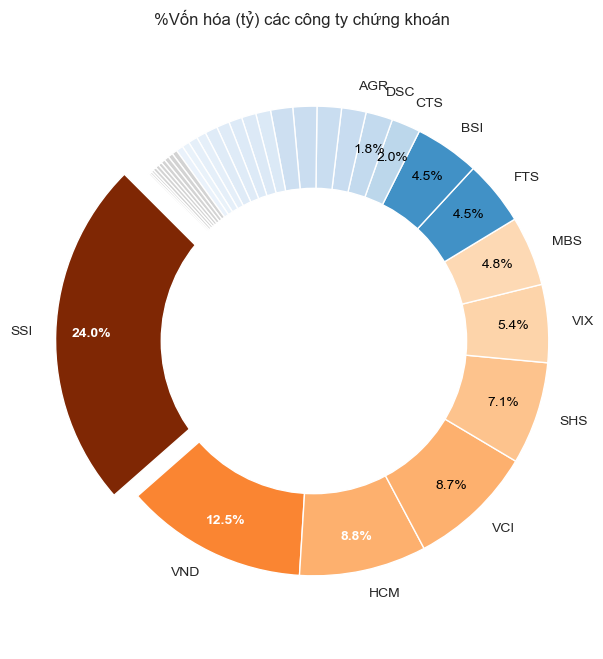

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return plt.cm.Oranges(value / 50000)  # Sử dụng colormap 'Oranges'
    elif 1000 < value <= 10000:
        return plt.cm.Blues(value / 15000)  # Sử dụng colormap 'Greens'
    elif value <= 1000:
        return 'lightgray'

# Hàm tùy chỉnh để hiển thị phần trăm
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 1.8 else ''

# Sắp xếp dữ liệu từ lớn đến bé
dfr_sorted = dfr.sort_values(by='Vốn hóa (tỷ)', ascending=False)

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

labels = ['' if i >= 12 else v for i, v in enumerate(dfr_sorted["Mã CP"])]

# Tạo danh sách explode
explode = [0.1 if i == 0 else 0 for i in range(len(dfr_sorted))]

# Vẽ biểu đồ pie chart
plt.figure(figsize=(7, 8))  # Đặt kích thước hình vẽ thành 10x10
patches, texts, autotexts = plt.pie(dfr_sorted["Vốn hóa (tỷ)"], 
                                    labels=labels, 
                                    autopct=custom_autopct, startangle=135, 
                                    colors=dfr_sorted['color'], explode=explode, pctdistance=0.85)

# Vẽ một vòng tròn trắng ở giữa
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('%Vốn hóa (tỷ) các công ty chứng khoán')

# Đặt màu cho phần trăm
for i, autotext in enumerate(autotexts):
    if i < 3:
        autotext.set_color('white')
        autotext.set_weight('bold')
    else:
        autotext.set_color('black')

#output_file_path = '%Vốn_hoá.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


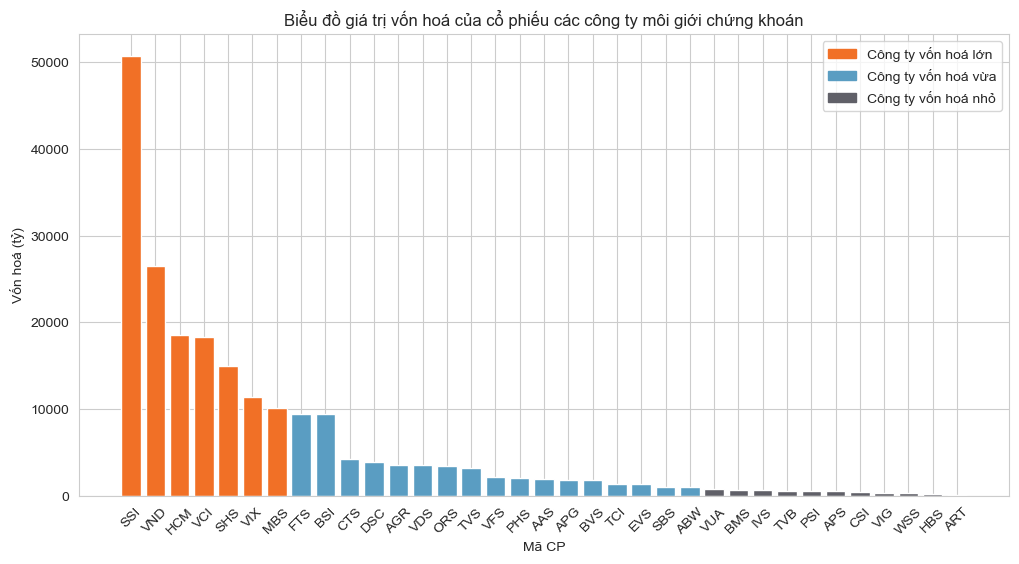

<Figure size 1920x1440 with 0 Axes>

In [16]:
# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ bar với màu sắc tương ứng
bar1 = ax.bar(dfr_sorted['Mã CP'], dfr_sorted['Vốn hóa (tỷ)'], label='Vốn hoá (tỷ)', color=dfr_sorted['color'])

ax.set_ylabel('Vốn hoá (tỷ)')
ax.set_xlabel('Mã CP')
ax.set_title('Biểu đồ giá trị vốn hoá của cổ phiếu các công ty môi giới chứng khoán')
ax.set_xticks(dfr_sorted['Mã CP'])
ax.set_xticklabels(dfr_sorted['Mã CP'], rotation=45)
ax.tick_params(axis='x', labelsize=10)

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở dưới bên phải
plt.legend(handles=[orange_patch, green_patch, gray_patch], loc='upper right')

#output_file_path = 'Bar_chart_Vốn_hoá.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=300)
plt.show()

In [17]:
mean_p_b = dfr["P/B"].mean()
print(mean_p_b)


1.4942857142857144


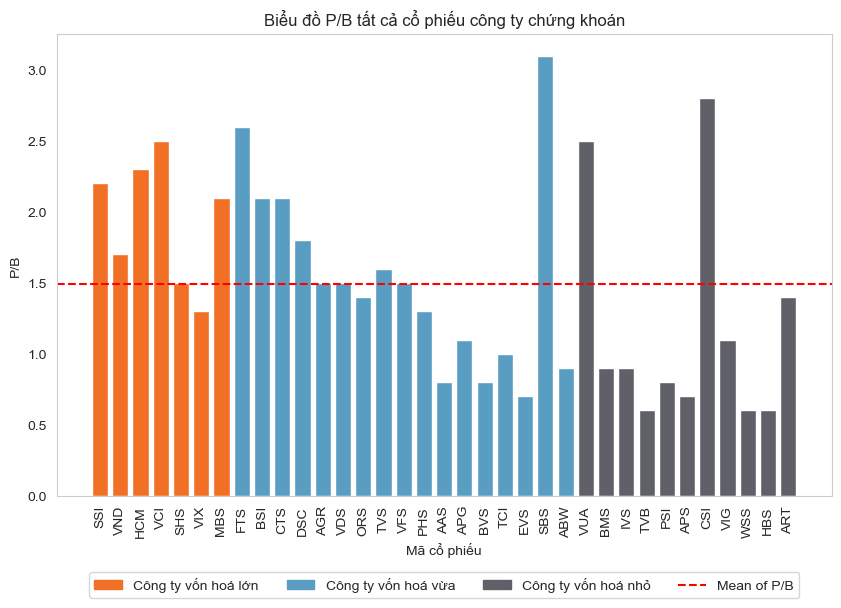

<Figure size 1920x1440 with 0 Axes>

In [18]:
# Lọc DataFrame để chỉ giữ lại các hàng có ROE dương
#dfr_sorted_positive_roe = dfr_sorted.loc[dfr_sorted['ROE'] > 0]

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

plt.figure(figsize=(10, 6))
plt.bar(dfr_sorted["Mã CP"], dfr_sorted["P/B"], 
        label="P/B", color=dfr_sorted['color'])
mean_pb_line = plt.axhline(y=dfr_sorted["P/B"].mean(), 
                           color='r', linestyle='--', 
                           label="Mean of P/B")

plt.xlabel("Mã cổ phiếu")
plt.ylabel("P/B")
plt.title("Biểu đồ P/B tất cả cổ phiếu công ty chứng khoán")
plt.xticks(rotation=90)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch, mean_pb_line], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

#output_file_path = 'bar_pb_all.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12712\520957609.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr_positive_roe['color'] = dfr_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)


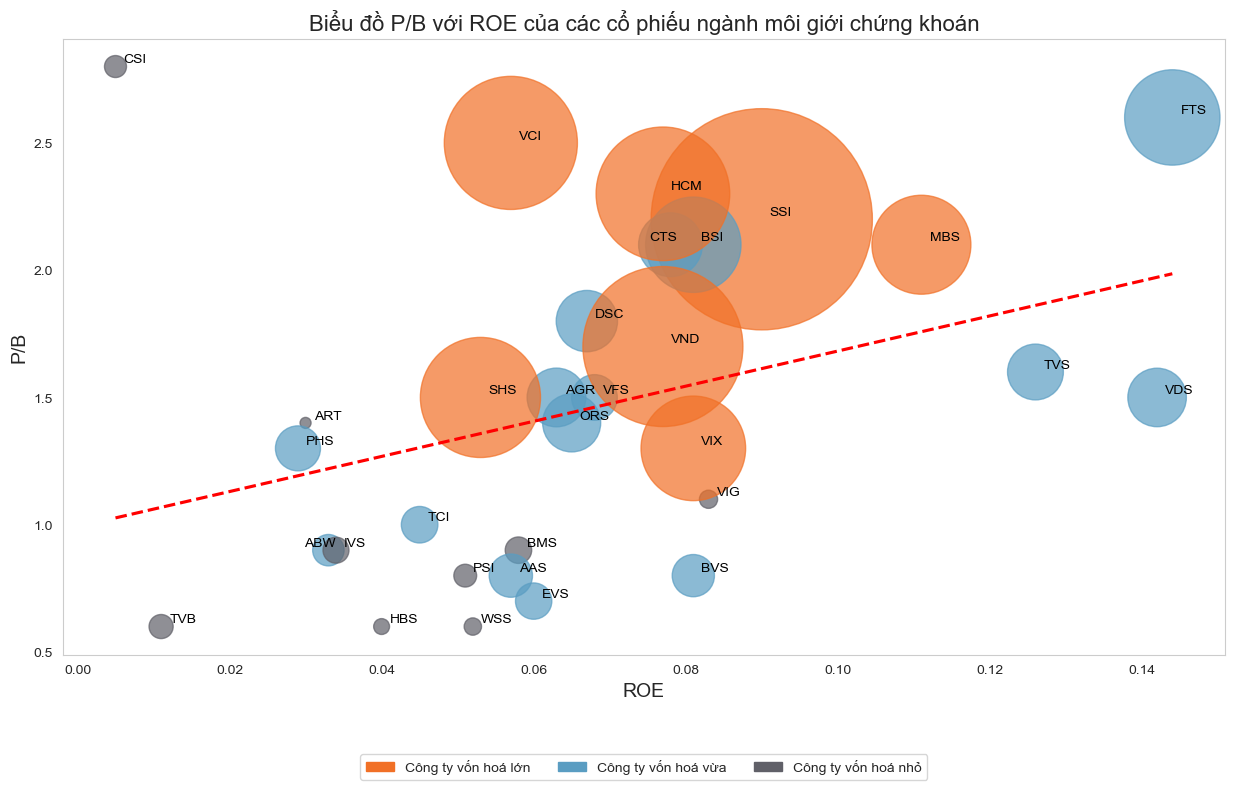

<Figure size 3840x2880 with 0 Axes>

In [19]:
# Lọc DataFrame để chỉ giữ lại các hàng có ROE dương
dfr_positive_roe = dfr.loc[dfr['ROE'] > 0]

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_positive_roe['color'] = dfr_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)

from adjustText import adjust_text

# Scatter plot with regression line (without confidence interval), size by log(Market Cap)
plt.figure(figsize=(15, 8))

# Use plt.scatter to create the scatter plot with custom colors
plt.scatter(x=dfr_positive_roe['ROE'], y=dfr_positive_roe['P/B'], 
            s=dfr_positive_roe['Vốn hóa (tỷ)']/2, alpha=0.7, 
            c=dfr_positive_roe['color'])

# Use sns.regplot to add the regression line
sns.regplot(x='ROE', y='P/B', data=dfr_positive_roe, 
            scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--'}, ci=None)

texts = []
for index, row in dfr_positive_roe.iterrows():
    texts.append(plt.text(row['ROE'] + 0.001, row['P/B'], row['Mã CP'],
                      horizontalalignment='left', size='medium', color='black'))

adjust_text(texts)

plt.xlabel('ROE', fontsize=14)
plt.ylabel('P/B', fontsize=14)
plt.title('Biểu đồ P/B với ROE của các cổ phiếu ngành môi giới chứng khoán', fontsize=16)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

#output_file_path = 'scatter_reg_line_pb_roe.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=600)
plt.show()



In [20]:
dfr_sorted_positive_roe = dfr_sorted.loc[dfr_sorted['ROE'] > 0]

In [21]:
dfr_top9 = dfr_sorted_positive_roe.head(9).reset_index()
dfr_top9

,index,Mã CP,Vốn hóa (tỷ),P/B,ROE,color
0,0,SSI,50746.0,2.2,0.090,#F17026
1,34,VND,26549.0,1.7,0.077,#F17026
2,14,HCM,18520.0,2.3,0.077,#F17026
3,28,VCI,18375.0,2.5,0.057,#F17026
4,23,SHS,14962.0,1.5,0.053,#F17026
5,33,VIX,11347.0,1.3,0.081,#F17026
6,25,MBS,10153.0,2.1,0.111,#F17026
7,11,FTS,9430.0,2.6,0.144,#5A9DC2
8,6,BSI,9429.0,2.1,0.081,#5A9DC2


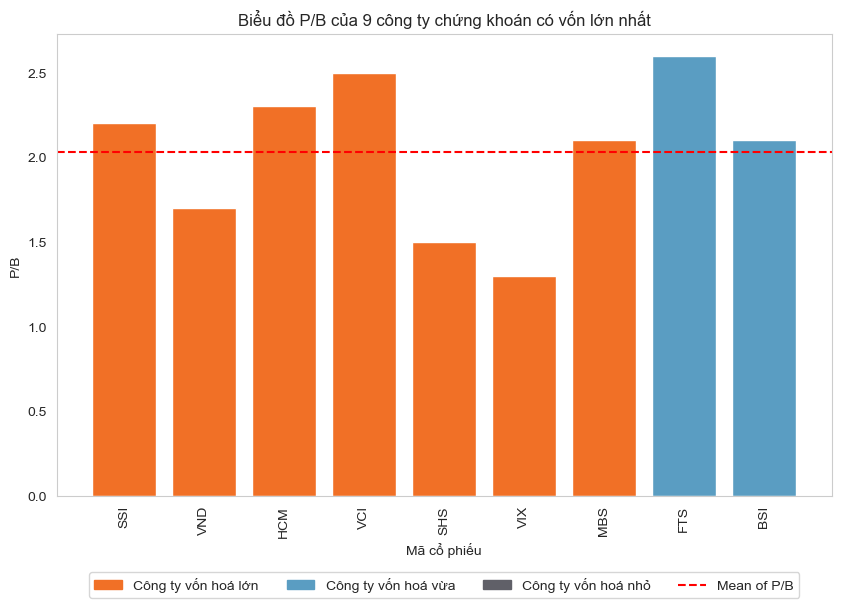

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(dfr_top9["Mã CP"], dfr_top9["P/B"], 
        label="P/B", color= dfr_top9['color'])
mean_pb_line = plt.axhline(y=dfr_top9["P/B"].mean(), color='r', linestyle='--', label="Mean of P/B")

plt.xlabel("Mã cổ phiếu", fontsize = 10)
plt.ylabel("P/B")
plt.title("Biểu đồ P/B của 9 công ty chứng khoán có vốn lớn nhất")
plt.xticks(rotation=90)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch, mean_pb_line], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

#output_file_path = 'bar_pb_top_9.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


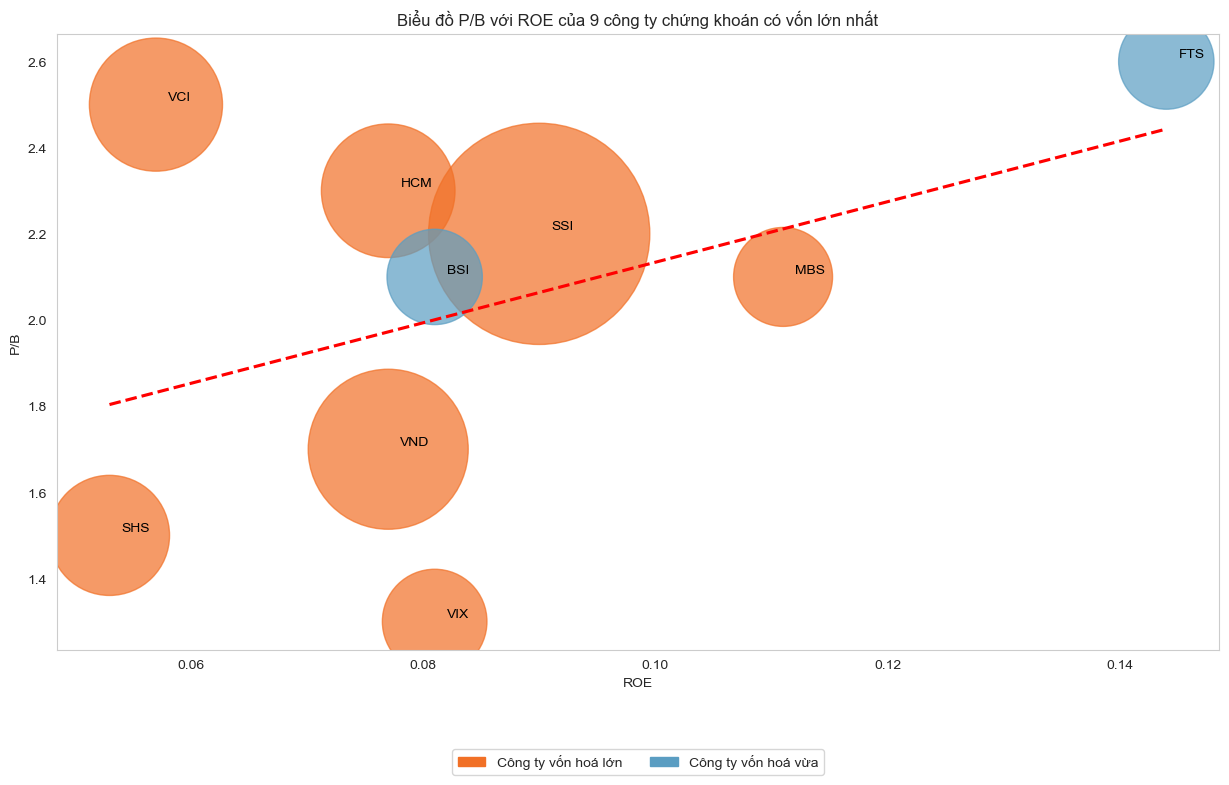

<Figure size 3840x2880 with 0 Axes>

In [23]:
from adjustText import adjust_text

# Scatter plot with regression line (without confidence interval), size by log(Market Cap)
plt.figure(figsize=(15, 8))

# Use plt.scatter to create the scatter plot with custom colors
plt.scatter(x=dfr_top9['ROE'], y=dfr_top9['P/B'], 
            s=dfr_top9['Vốn hóa (tỷ)']/2, alpha=0.7, 
            c=dfr_top9['color'])

# Use sns.regplot to add the regression line
sns.regplot(x='ROE', y='P/B', data=dfr_top9, 
            scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--'}, ci=None)

texts = []
for index, row in dfr_top9.iterrows():
    texts.append(plt.text(row['ROE'] + 0.001, row['P/B'], row['Mã CP'],
                      horizontalalignment='left', size='medium', color='black'))

adjust_text(texts)

plt.xlabel('ROE')
plt.ylabel('P/B')
plt.title('Biểu đồ P/B với ROE của 9 công ty chứng khoán có vốn lớn nhất')
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

#output_file_path = 'scatter_reg_pb_top_9.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=600)
plt.show()



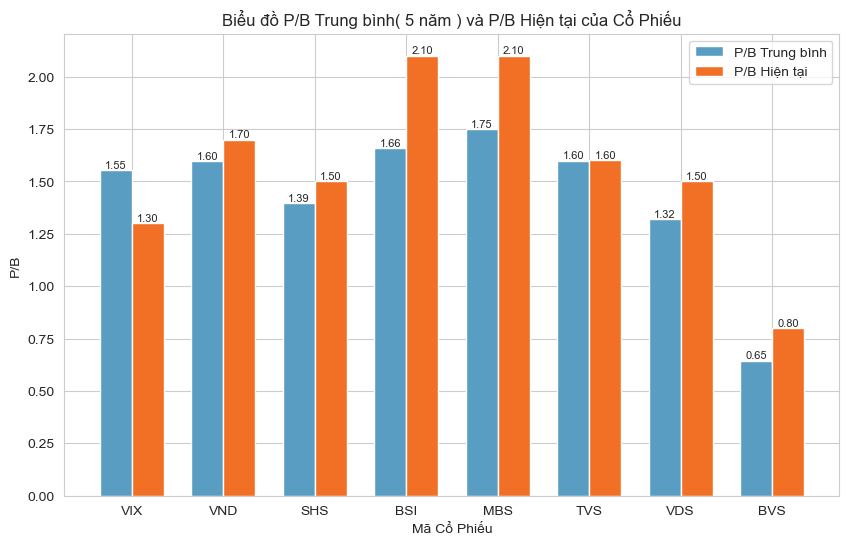

In [24]:
last_stock_list = ["VIX", "VND","SHS", "BSI", "MBS","TVS", "VDS", "BVS" ]

data_vix = vn.stock_evaluation (symbol='VIX', period=5, time_window='Y')
data_vnd = vn.stock_evaluation (symbol='VND', period=5, time_window='Y')
data_shs = vn.stock_evaluation (symbol='SHS', period=5, time_window='Y')
data_bsi = vn.stock_evaluation (symbol='BSI', period=5, time_window='Y')
data_mbs = vn.stock_evaluation (symbol='MBS', period=5, time_window='Y')
data_tvs = vn.stock_evaluation (symbol='TVS', period=5, time_window='Y')
data_vds = vn.stock_evaluation (symbol='VDS', period=5, time_window='Y')
data_bvs = vn.stock_evaluation (symbol='BVS', period=5, time_window='Y')

avg_pb_vix = data_vix['PB'].mean()
avg_pb_vnd = data_vnd['PB'].mean()
avg_pb_shs = data_shs['PB'].mean()
avg_pb_bsi = data_bsi['PB'].mean()
avg_pb_mbs = data_mbs['PB'].mean()
avg_pb_tvs = data_tvs['PB'].mean()
avg_pb_vds = data_vds['PB'].mean()
avg_pb_bvs = data_bvs['PB'].mean()



# Mã cổ phiếu và giá trị P/B tương ứng
avg_pbs = [avg_pb_vix, avg_pb_vnd, 
           avg_pb_shs, avg_pb_bsi, 
           avg_pb_mbs, avg_pb_tvs, 
           avg_pb_vds, avg_pb_bvs]
current_pbs = [ data_vix['PB'].iloc[-1], data_vnd['PB'].iloc[-1], 
               data_shs['PB'].iloc[-1], data_bsi['PB'].iloc[-1],
               data_mbs['PB'].iloc[-1], data_tvs['PB'].iloc[-1],
               data_vds['PB'].iloc[-1], data_bvs['PB'].iloc[-1]]

# Số lượng mã cổ phiếu
num_stocks = len(last_stock_list)

# Vị trí của mỗi mã cổ phiếu trên biểu đồ
x = range(num_stocks)

# Độ rộng của các cột
width = 0.35

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho P/B trung bình
avg_bar = ax.bar(x, avg_pbs, width, label='P/B Trung bình', color='#5A9DC2')

# Vị trí cho cột P/B hiện tại
current_x = [i + width for i in x]

# Vẽ cột cho P/B hiện tại
current_bar = ax.bar(current_x, current_pbs, 
                     width, label='P/B Hiện tại', 
                     color='#F17026')

# Đặt tên cho các cột
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(last_stock_list)
ax.set_xlabel('Mã Cổ Phiếu')
ax.set_ylabel('P/B')
ax.set_title('Biểu đồ P/B Trung bình( 5 năm ) và P/B Hiện tại của Cổ Phiếu')
ax.legend()

# Hiển thị giá trị trên các cột
for bar in avg_bar + current_bar:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

#output_file_path = 'pb_mean_pb_5_year.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


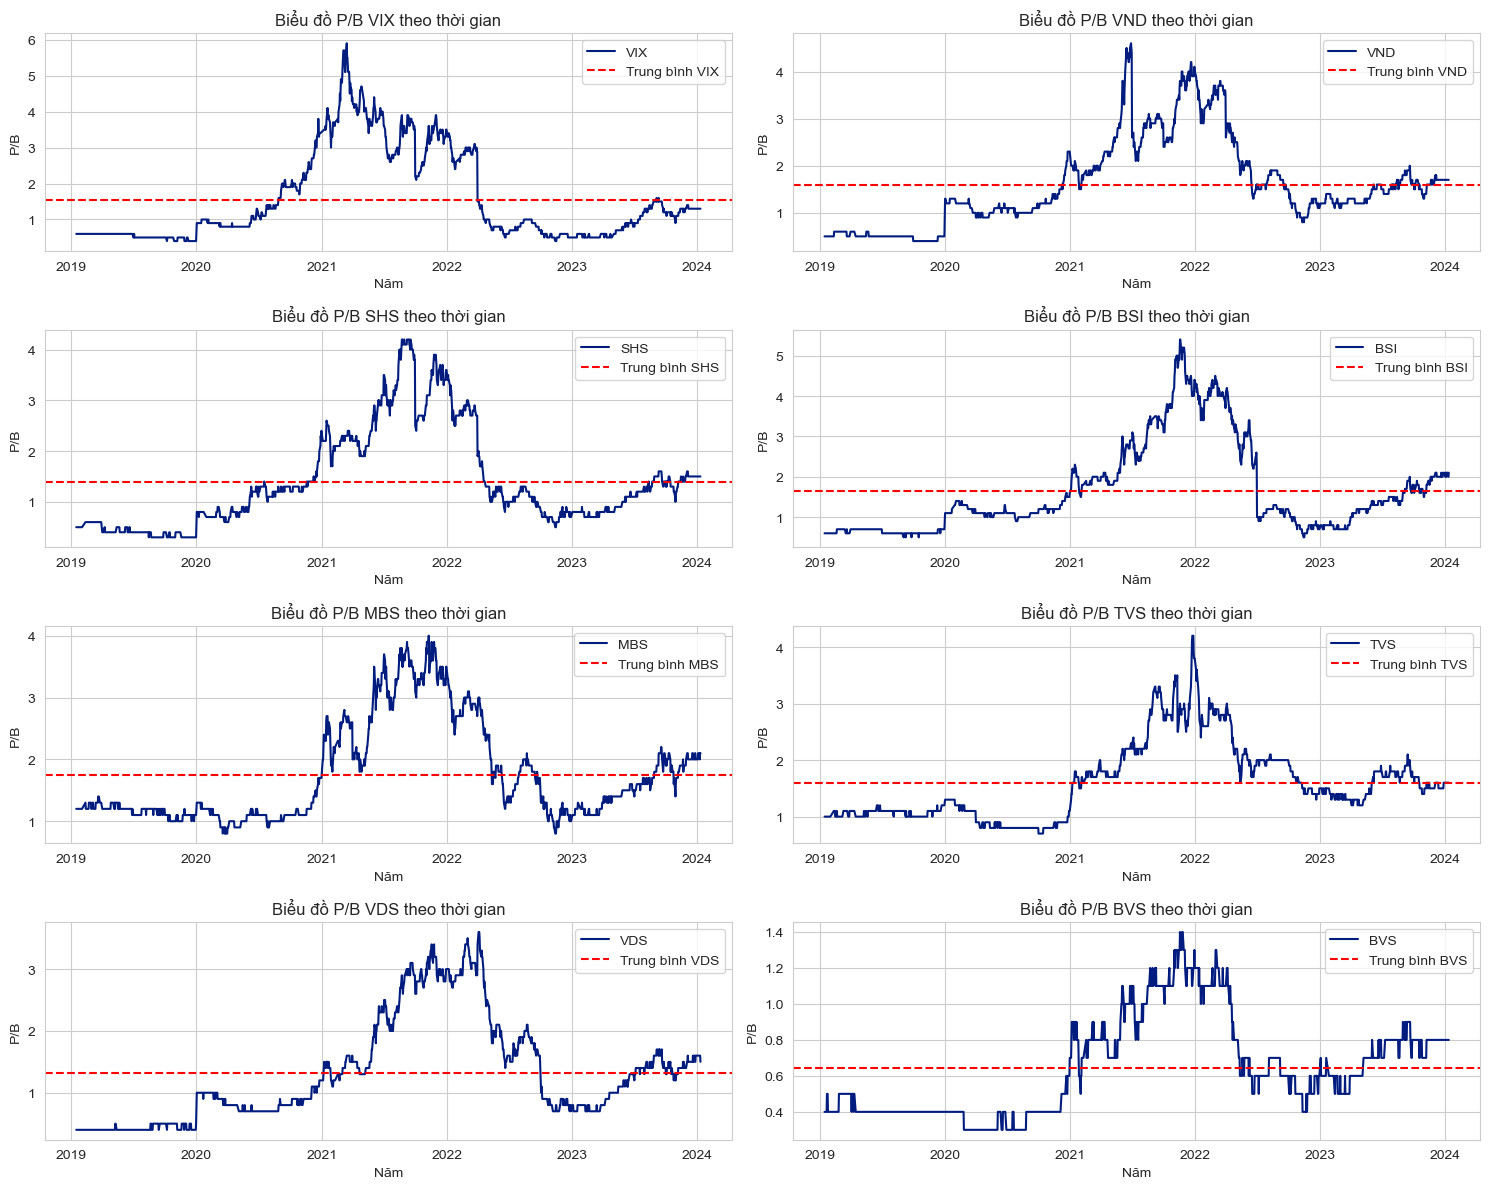

<Figure size 5120x3840 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

# Tạo một lưới 2x2 cho biểu đồ
fig, axs = plt.subplots(4, 2, figsize=(15, 12))

# Mã cổ phiếu và dữ liệu P/B tương ứng
pb_data = [data_vix, data_vnd, 
           data_shs, data_bsi,
           data_mbs, data_tvs,
           data_vds, data_bvs]
avg_pbs = [avg_pb_vix, avg_pb_vnd, 
           avg_pb_shs, avg_pb_bsi, 
           avg_pb_mbs, avg_pb_tvs, 
           avg_pb_vds, avg_pb_bvs]

# Vẽ biểu đồ cho từng mã cổ phiếu
for i in range(8):
    row, col = divmod(i, 2)  # Xác định vị trí hàng và cột trong lưới
    ax = axs[row, col]  # Lấy ô tại vị trí đó
    stock = last_stock_list[i]
    data = pb_data[i]
    avg_pb = avg_pbs[i]
    
    ax.plot(data['fromDate'], data['PB'], label=stock)  # Biểu đồ line P/B
    ax.axhline(y=avg_pb, color='r', linestyle='--', label=f"Trung bình {stock}")  # Đường trung bình
    ax.set_xlabel("Năm")
    ax.set_ylabel("P/B")
    ax.set_title(f"Biểu đồ P/B {stock} theo thời gian")
    ax.legend()

# Tạo khoảng trống cho tiêu đề chung của lưới
plt.tight_layout()

#output_file_path = 'pb_mean_pb_5_year_lineplot.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)
plt.show()


In [26]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 500
import os
import openpyxl

# Đường dẫn chung, có thể thay đổi ổ đĩa D sang ổ đĩa khác cho phù hợp với máy bạn
path = r'D:\Downloads\Portfolio_Project\2. Stock Analysis\ANALYZING STOCK OF SECURITIES BROKERAGE FIRMS IN VIETNAM\BCTT'

# Lấy danh sách tất cả các file trong thư mục
files = os.listdir(path)
Mã_CP = []

# Lặp qua danh sách các file
for file in files:
    # Xác định mã cổ phiếu và loại báo cáo từ tên file
    code = file.split('_')[1]
    Mã_CP.append(code)
    report_type = file.split('_')[-2].split('.')[0]  # Loại bỏ phần mở rộng của file

    # Kiểm tra số lượng sheet trong file
    workbook = openpyxl.load_workbook(os.path.join(path, file), read_only=True)
    if len(workbook.sheetnames) > 1:
        # Nếu file có nhiều hơn một sheet, đọc sheet có tên là "LCTT"
        df = pd.read_excel(os.path.join(path, file), sheet_name='LCTT')
        header_row_index = df[df.apply(lambda row: row.astype(str).str.contains('LƯU CHUYỂN TIỀN TỆ GIÁN TIẾP').any(), 
                                       axis=1)].index[0]
        df = df.iloc[header_row_index:]
    else:
        # Nếu file chỉ có một sheet, đọc sheet đó
        df = pd.read_excel(os.path.join(path, file))
        df = df.iloc[4:]

    # Đặt hàng đầu tiên làm cột chính và xóa tên cột đầu tiên
    df.rename(index={df.index[0]: ""}, inplace=True)
    df.columns = df.iloc[0]
    df = df.iloc[7:-12]
    df.rename(columns={df.columns[0]: ""}, inplace=True)

    # Thay thế các giá trị NaN bằng 0
    df = df.fillna(0)
    df.reset_index(drop=True, inplace=True)
    df.set_index(df.columns[0], inplace=True)

    # Lưu DataFrame vào một biến toàn cục
    globals()[f'{code}_{report_type}'] = df


In [27]:
Mã_CP = list(set(Mã_CP))
print(Mã_CP)

['AAS', 'BVS', 'TVS', 'MBS', 'AGR', 'HCM', 'SHS', 'CTS', 'APG', 'BSI', 'VCI', 'FTS', 'VND', 'DSC', 'ORS', 'SSI', 'VIX', 'VFS', 'VDS', 'PHS']


In [28]:
print(len(Mã_CP))

20


In [29]:
def NOWC_df(stock_CDKT):
    # Tạo DataFrame mới với cùng các cột như VIX_CDKT
    stock_NOWC = pd.DataFrame(columns=stock_CDKT.columns)


    # Chọn hàng có index chứa "A. TÀI SẢN NGẮN HẠN"
    short_term_assets = stock_CDKT[stock_CDKT.index.str.contains('A. TÀI SẢN NGẮN HẠN')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(short_term_assets) > 1:
        short_term_assets = short_term_assets.iloc[0]

    # Thêm vào DataFrame
    stock_NOWC.loc['Tài sản ngắn hạn'] = short_term_assets.squeeze()
    stock_NOWC.loc['Tăng/Giảm tài sản ngắn hạn'] = stock_NOWC.loc['Tài sản ngắn hạn'].to_frame().T.diff(axis=1).values[0]

    # Chọn hàng có index chứa "I. Nợ ngắn hạn"
    short_term_debts = stock_CDKT[stock_CDKT.index.str.contains('I. Nợ ngắn hạn')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(short_term_debts) > 1:
        short_term_debts = short_term_debts.iloc[0]

    # Thêm vào DataFrame
    stock_NOWC.loc['Nợ ngắn hạn'] = short_term_debts.squeeze()
    stock_NOWC.loc['Tăng/Giảm nợ ngắn hạn'] = stock_NOWC.loc['Nợ ngắn hạn'].to_frame().T.diff(axis=1).values[0]
    stock_NOWC.loc['Tăng/Giảm vốn lưu động'] =stock_NOWC.loc['Tăng/Giảm tài sản ngắn hạn'] - stock_NOWC.loc['Tăng/Giảm nợ ngắn hạn']
    return stock_NOWC


In [30]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_NOWC'] = NOWC_df(stock_CDKT)


In [31]:
VIX_NOWC

,2017,2018,2019,2020,2021,2022
Tài sản ngắn hạn,1282.00,1493.00,1729.00,2099.00,4712.00,8121.00
Tăng/Giảm tài sản ngắn hạn,NaN,211.00,236.00,370.00,2613.00,3409.00
Nợ ngắn hạn,67.00,309.00,213.00,127.00,449.00,285.00
Tăng/Giảm nợ ngắn hạn,NaN,242.00,-96.00,-86.00,322.00,-164.00
Tăng/Giảm vốn lưu động,NaN,-31.00,332.00,456.00,2291.00,3573.00


In [32]:
def CAPEX_df(stock_LCTT):
    stock_CAPEX = pd.DataFrame(columns=stock_LCTT.columns)
    stock_CAPEX.loc['Tiền chi TSCĐ'] = stock_LCTT.loc['1. Tiền chi để mua sắm, xây dựng TSCĐ và các tài sản dài hạn khác']
    stock_CAPEX.loc['Tiền thu từ TSCĐ'] = stock_LCTT.loc['2. Tiền thu từ thanh lý, nhượng bán TSCĐ và các tài sản dài hạn khác']
    stock_CAPEX.loc['Chi đầu tư mới vào TSCĐ'] = - (stock_CAPEX.loc['Tiền chi TSCĐ'] + stock_CAPEX.loc['Tiền thu từ TSCĐ'])
    return stock_CAPEX

In [33]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_LCTT = globals()[f'{stock_code}_LCTT']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_CAPEX'] = CAPEX_df(stock_LCTT)


In [34]:
VIX_CAPEX

,2017,2018,2019,2020,2021,2022
Tiền chi TSCĐ,-1,0,0,-1,-1,-2
Tiền thu từ TSCĐ,1,0,0,0,0,0
Chi đầu tư mới vào TSCĐ,0,0,0,1,1,2


In [35]:
def NetDebt_df(stock_CDKT):
    stock_NetDebt = pd.DataFrame(columns=stock_CDKT.columns)

    # Chọn hàng có index chứa "A. TÀI SẢN NGẮN HẠN"
    cash = stock_CDKT[stock_CDKT.index.str.contains('1. Tiền và các khoản tương đương tiền')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(cash) > 1:
        cash = cash.iloc[0]

    # Thêm vào DataFrame
    stock_NetDebt.loc['Tiền và các khoản tương đương tiền'] = cash.squeeze()

    # Chọn hàng có index chứa "I. Nợ ngắn hạn"
    short_term_debts = stock_CDKT[stock_CDKT.index.str.contains('I. Nợ ngắn hạn')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(short_term_debts) > 1:
        short_term_debts = short_term_debts.iloc[0]

    
    stock_NetDebt.loc['Nợ ngắn hạn'] = short_term_debts.squeeze()
   

    # Chọn hàng có index chứa "I. Nợ ngắn hạn"
    long_term_debts = stock_CDKT[stock_CDKT.index.str.contains('II. Nợ dài hạn')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(long_term_debts) > 1:
        long_term_debts = long_term_debts.iloc[0]

    # Thêm vào DataFrame
    stock_NetDebt.loc['Nợ dài hạn'] = long_term_debts.squeeze()
    stock_NetDebt.loc['Nợ ròng'] = (stock_NetDebt.loc['Nợ ngắn hạn'] 
                                 + stock_NetDebt.loc['Nợ dài hạn']
                                ) - stock_NetDebt.loc['Tiền và các khoản tương đương tiền']

    stock_NetDebt.loc['Tăng/Giảm nợ ròng'] = stock_NetDebt.loc['Nợ ròng'].to_frame().T.diff(axis=1).values[0]
    return stock_NetDebt

In [36]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_NetDebt'] = NetDebt_df(stock_CDKT)


In [37]:
VIX_NetDebt

,2017,2018,2019,2020,2021,2022
Tiền và các khoản tương đương tiền,14.00,4.00,152.00,56.00,80.00,1350.00
Nợ ngắn hạn,67.00,309.00,213.00,127.00,449.00,285.00
Nợ dài hạn,332.00,117.00,133.00,239.00,519.00,0.00
Nợ ròng,385.00,422.00,194.00,310.00,888.00,-1065.00
Tăng/Giảm nợ ròng,NaN,37.00,-228.00,116.00,578.00,-1953.00


In [38]:
def FCFE_df(stock_CDKT, stock_KQKD, 
            stock_LCTT, stock_NOWC, 
            stock_CAPEX, stock_NetDebt):
    # Tạo DataFrame mới với cùng các cột như VIX_KQKD
    stock_FCFE = pd.DataFrame(columns=stock_KQKD.columns)

    # Tính toán và thêm các biến vào VIX_FCFE
    stock_FCFE.loc['Doanh thu thuần'] = stock_KQKD.loc['Doanh thu thuần']
    stock_FCFE.loc['Tăng trưởng doanh thu thuần'] = stock_KQKD.loc['Doanh thu thuần'].to_frame().T.pct_change(axis=1).values[0]
    stock_FCFE.loc['Chi phí hoạt động kinh doanh'] = stock_KQKD.loc['Cộng chi phí hoạt động (21->33)']
    stock_FCFE.loc['% Chi phí hoạt động / Doanh thu thuần'] = stock_FCFE.loc['Chi phí hoạt động kinh doanh'] / stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Lợi nhuận gộp'] = stock_FCFE.loc['Doanh thu thuần'] - stock_FCFE.loc['Chi phí hoạt động kinh doanh']
    stock_FCFE.loc['Chi phí quản lý công ty chứng khoán'] = stock_KQKD.loc['VI. CHI PHÍ QUẢN LÝ CÔNG TY CHỨNG KHOÁN']
    stock_FCFE.loc['% Chi phí quản lý / Doanh thu thuần'] = stock_FCFE.loc['Chi phí quản lý công ty chứng khoán'] / stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Thu nhập khác ròng'] = stock_KQKD.loc['Cộng kết quả hoạt động khác']
    stock_FCFE.loc['% Thu nhập khác ròng / Doanh thu thuần'] = stock_FCFE.loc['Thu nhập khác ròng'] / stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Lãi/lỗ từ công ty liên doanh, liên kết'] = stock_KQKD.loc['Lãi/lỗ từ công ty liên doanh, liên kết']
    stock_FCFE.loc['% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần'] = stock_FCFE.loc['Lãi/lỗ từ công ty liên doanh, liên kết'] / stock_FCFE.loc['Doanh thu thuần']

    stock_FCFE.loc['Tổng lợi nhuận kế toán trước thuế'] = (((stock_FCFE.loc['Lợi nhuận gộp'] 
                                                         - stock_FCFE.loc['Chi phí quản lý công ty chứng khoán']) 
                                                         + stock_FCFE.loc['Thu nhập khác ròng']) 
                                                         + stock_FCFE.loc['Lãi/lỗ từ công ty liên doanh, liên kết'])

    stock_FCFE.loc['Chi phí thuế thu nhập doanh nghiệp'] = stock_KQKD.loc['X. CHI PHÍ THUẾ THU NHẬP DOANH NGHIỆP']
    stock_FCFE.loc['% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế'] = stock_FCFE.loc['Chi phí thuế thu nhập doanh nghiệp'] / stock_FCFE.loc['Tổng lợi nhuận kế toán trước thuế']
    stock_FCFE.loc['Lợi nhuận kế toán sau thuế'] = (stock_FCFE.loc['Tổng lợi nhuận kế toán trước thuế'] 
                                                  - stock_FCFE.loc['Chi phí thuế thu nhập doanh nghiệp'])
        # Kiểm tra xem có 'Khấu hao tài sản cố định' trong stock_LCTT hay không
    if '- Khấu hao tài sản cố định' in stock_LCTT.index:
        stock_FCFE.loc['Khấu hao'] = stock_LCTT.loc['- Khấu hao tài sản cố định'].values
    else:
        # Nếu không có, gán giá trị 0 cho mọi năm từ 2017 đến 2022
        stock_FCFE.loc['Khấu hao'] = 0

    stock_FCFE.loc['% Khấu hao / Doanh thu thuần'] = stock_FCFE.loc['Khấu hao']/ stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Tăng/Giảm vốn lưu động'] = stock_NOWC.loc['Tăng/Giảm vốn lưu động']
    stock_FCFE.loc['% Tăng/Giảm vốn lưu động / Doanh thu thuần'] = stock_FCFE.loc['Tăng/Giảm vốn lưu động']/ stock_FCFE.loc['Doanh thu thuần']
    # Kiểm tra xem có 'Chi đầu tư mới vào TSCĐ' trong stock_CAPEX hay không
    if 'Chi đầu tư mới vào TSCĐ' in stock_CAPEX.index:
        stock_FCFE.loc['Chi đầu tư mới vào TSCĐ'] = stock_CAPEX.loc['Chi đầu tư mới vào TSCĐ'].values
    else:
        # Nếu không có, gán giá trị 0 cho mọi năm từ 2017 đến 2022
        stock_FCFE.loc['Chi đầu tư mới vào TSCĐ'] = 0
    
    stock_FCFE.loc['% Chi đầu tư mới vào TSCĐ / Doanh thu thuần'] = stock_FCFE.loc['Chi đầu tư mới vào TSCĐ']/ stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Tăng/Giảm nợ ròng'] = stock_NetDebt.loc['Tăng/Giảm nợ ròng']
    stock_FCFE.loc['% Tăng/Giảm nợ ròng / Doanh thu thuần'] = stock_FCFE.loc['Tăng/Giảm nợ ròng']/ stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['FCFE'] = ((((stock_FCFE.loc['Lợi nhuận kế toán sau thuế'] 
                            + stock_FCFE.loc['Khấu hao']) 
                            - stock_FCFE.loc['Chi đầu tư mới vào TSCĐ']) 
                            - stock_FCFE.loc['Tăng/Giảm vốn lưu động']) 
                            + stock_FCFE.loc['Tăng/Giảm nợ ròng'])



    return stock_FCFE


In [39]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    stock_KQKD = globals()[f'{stock_code}_KQKD']
    stock_LCTT = globals()[f'{stock_code}_LCTT']
    stock_NOWC = globals()[f'{stock_code}_NOWC']
    stock_CAPEX = globals()[f'{stock_code}_CAPEX']
    stock_NetDebt = globals()[f'{stock_code}_NetDebt']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_FCFE'] = FCFE_df(stock_CDKT, stock_KQKD,
                                              stock_LCTT, stock_NOWC, 
                                              stock_CAPEX, stock_NetDebt)


In [40]:
VIX_FCFE

,2017,2018,2019,2020,2021,2022
Doanh thu thuần,388.00,452.00,437.00,718.00,1570.00,1187.00
Tăng trưởng doanh thu thuần,NaN,0.16,-0.03,0.64,1.19,-0.24
Chi phí hoạt động kinh doanh,215.00,149.00,237.00,285.00,597.00,755.00
% Chi phí hoạt động / Doanh thu thuần,0.55,0.33,0.54,0.40,0.38,0.64
Lợi nhuận gộp,173.00,303.00,200.00,433.00,973.00,432.00
Chi phí quản lý công ty chứng khoán,24.00,21.00,19.00,17.00,19.00,26.00
% Chi phí quản lý / Doanh thu thuần,0.06,0.05,0.04,0.02,0.01,0.02
Thu nhập khác ròng,4.00,11.00,3.00,13.00,-1.00,0.00
% Thu nhập khác ròng / Doanh thu thuần,0.01,0.02,0.01,0.02,-0.00,0.00
"Lãi/lỗ từ công ty liên doanh, liên kết",0.00,0.00,0.00,0.00,0.00,0.00


In [41]:
def FCFE_FORECAST_df(stock_FCFE):
    stock_FCFE_FORECAST = stock_FCFE.assign(**{'2023': None, '2024': None, '2025': None})

    def mean_forecast(Metrics): 
        mean_metrics_rev = stock_FCFE_FORECAST.loc[Metrics].dropna().tail(5).mean()
        stock_FCFE_FORECAST.loc[Metrics, ['2023', '2024', '2025']] =  mean_metrics_rev

    mean_forecast("% Chi phí hoạt động / Doanh thu thuần")
    mean_forecast("% Chi phí quản lý / Doanh thu thuần")
    mean_forecast("% Thu nhập khác ròng / Doanh thu thuần")
    mean_forecast("% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần")
    mean_forecast("% Khấu hao / Doanh thu thuần")

    mean_forecast("% Chi đầu tư mới vào TSCĐ / Doanh thu thuần")
    mean_forecast("% Tăng/Giảm nợ ròng / Doanh thu thuần")
    last_tax_income_ratio = stock_FCFE_FORECAST.loc["% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế", "2022"]
    stock_FCFE_FORECAST.loc["% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế"
                          , ['2023', '2024', '2025']] =  last_tax_income_ratio

    years = ['2023', '2024', '2025']
    for i, year in enumerate(years):
        start_year = 2018 + i
        end_year = 2022 + i
        mean_revenue_growth = stock_FCFE_FORECAST.loc["Tăng trưởng doanh thu thuần", f"{start_year}":f"{end_year}"].mean()
        stock_FCFE_FORECAST.loc["Tăng trưởng doanh thu thuần", year] = mean_revenue_growth
        mean_WC_growth = stock_FCFE_FORECAST.loc["% Tăng/Giảm vốn lưu động / Doanh thu thuần"].mean()
        stock_FCFE_FORECAST.loc["% Tăng/Giảm vốn lưu động / Doanh thu thuần", year] = mean_WC_growth

    for year in range(2023, 2026):
        # Tính doanh thu thuần cho năm hiện tại
        stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] = (stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year - 1)] 
                                                               * (1 + stock_FCFE_FORECAST.loc['Tăng trưởng doanh thu thuần', str(year)]))
        stock_FCFE_FORECAST.loc['Chi phí hoạt động kinh doanh', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Chi phí hoạt động / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Chi phí quản lý công ty chứng khoán', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Chi phí quản lý / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Thu nhập khác ròng', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Thu nhập khác ròng / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Lãi/lỗ từ công ty liên doanh, liên kết', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Khấu hao', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Khấu hao / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Tăng/Giảm vốn lưu động', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Tăng/Giảm vốn lưu động / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Chi đầu tư mới vào TSCĐ', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Chi đầu tư mới vào TSCĐ / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Tăng/Giảm nợ ròng', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Tăng/Giảm nợ ròng / Doanh thu thuần', str(year)]

    stock_FCFE_FORECAST.loc['Lợi nhuận gộp'] = stock_FCFE_FORECAST.loc['Doanh thu thuần'] - stock_FCFE_FORECAST.loc['Chi phí hoạt động kinh doanh']
    stock_FCFE_FORECAST.loc['Tổng lợi nhuận kế toán trước thuế'] = (((stock_FCFE_FORECAST.loc['Lợi nhuận gộp'] 
                                                         - stock_FCFE_FORECAST.loc['Chi phí quản lý công ty chứng khoán']) 
                                                         + stock_FCFE_FORECAST.loc['Thu nhập khác ròng']) 
                                                         + stock_FCFE_FORECAST.loc['Lãi/lỗ từ công ty liên doanh, liên kết'])

    stock_FCFE_FORECAST.loc['Chi phí thuế thu nhập doanh nghiệp'] = stock_FCFE_FORECAST.loc['Tổng lợi nhuận kế toán trước thuế'] * stock_FCFE_FORECAST.loc['% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế']
    stock_FCFE_FORECAST.loc['Lợi nhuận kế toán sau thuế'] = (stock_FCFE_FORECAST.loc['Tổng lợi nhuận kế toán trước thuế'] 
                                                  - stock_FCFE_FORECAST.loc['Chi phí thuế thu nhập doanh nghiệp'])

    stock_FCFE_FORECAST.loc['FCFE'] = ((((stock_FCFE_FORECAST.loc['Lợi nhuận kế toán sau thuế'] 
                            + stock_FCFE_FORECAST.loc['Khấu hao']) 
                            - stock_FCFE_FORECAST.loc['Chi đầu tư mới vào TSCĐ']) 
                            - stock_FCFE_FORECAST.loc['Tăng/Giảm vốn lưu động']) 
                            + stock_FCFE_FORECAST.loc['Tăng/Giảm nợ ròng'])
    return stock_FCFE_FORECAST


In [42]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE = globals()[f'{stock_code}_FCFE']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_FCFE_FORECAST'] = FCFE_FORECAST_df(stock_FCFE)


In [43]:
VIX_FCFE_FORECAST

,2017,2018,2019,2020,2021,2022,2023,2024,2025
Doanh thu thuần,388.00,452.00,437.00,718.00,1570.00,1187.00,1594.73,2199.45,3214.89
Tăng trưởng doanh thu thuần,NaN,0.16,-0.03,0.64,1.19,-0.24,0.34,0.38,0.46
Chi phí hoạt động kinh doanh,215.00,149.00,237.00,285.00,597.00,755.00,728.86,1005.25,1469.35
% Chi phí hoạt động / Doanh thu thuần,0.55,0.33,0.54,0.40,0.38,0.64,0.46,0.46,0.46
Lợi nhuận gộp,173.00,303.00,200.00,433.00,973.00,432.00,865.86,1194.20,1745.54
Chi phí quản lý công ty chứng khoán,24.00,21.00,19.00,17.00,19.00,26.00,47.08,64.94,94.92
% Chi phí quản lý / Doanh thu thuần,0.06,0.05,0.04,0.02,0.01,0.02,0.03,0.03,0.03
Thu nhập khác ròng,4.00,11.00,3.00,13.00,-1.00,0.00,15.52,21.41,31.29
% Thu nhập khác ròng / Doanh thu thuần,0.01,0.02,0.01,0.02,-0.00,0.00,0.01,0.01,0.01
"Lãi/lỗ từ công ty liên doanh, liên kết",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
import vnstock as vn
def CAPM(stock_code, start_date, end_date):
    import vnstock as vn
    Rf = 2.404/100
    Adj_Default_Spread = 3.22/100
    Equity_Risk_Premium = 9.57/100
    ERm = Adj_Default_Spread + Equity_Risk_Premium + Rf

    stock_2022 = vn.stock_historical_data(symbol=stock_code, start_date=start_date, end_date=end_date, resolution="1D", type="stock")
    VNINDEX_2022 = vn.stock_historical_data("VNINDEX", start_date, end_date, "1D", "index")

    stock_price_2022 = stock_2022[['time','close']]
    VNINDEX_price_2022 = VNINDEX_2022[['time','close']]

    # Đổi tên cột 'close'
    stock_price_2022 = stock_price_2022.rename(columns={'close': stock_code})
    VNINDEX_price_2022 = VNINDEX_price_2022.rename(columns={'close': 'VNINDEX'})

    # Gộp hai DataFrame
    merged_df = pd.merge(stock_price_2022, VNINDEX_price_2022, on='time')
    merged_df = merged_df.set_index('time')

    merged_df_return = merged_df.pct_change()
    merged_df_cov = merged_df_return.cov()*len(merged_df_return)

    stock_cov_VNINDEX = merged_df_cov.iloc[0,-1]
    VNINDEX_var =  merged_df_return['VNINDEX'].var() * len(merged_df)

    stock_beta = stock_cov_VNINDEX/VNINDEX_var
    stock_Re = Rf + stock_beta*(ERm - Rf)
    
    return stock_Re, stock_beta


In [45]:
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_Re, stock_beta = CAPM(stock_code, start_date="2022-01-01", end_date="2022-12-30")
    # Lưu kết quả vào các biến toàn cục
    globals()[f'{stock_code}_Re'] = stock_Re
    globals()[f'{stock_code}_beta'] = stock_beta


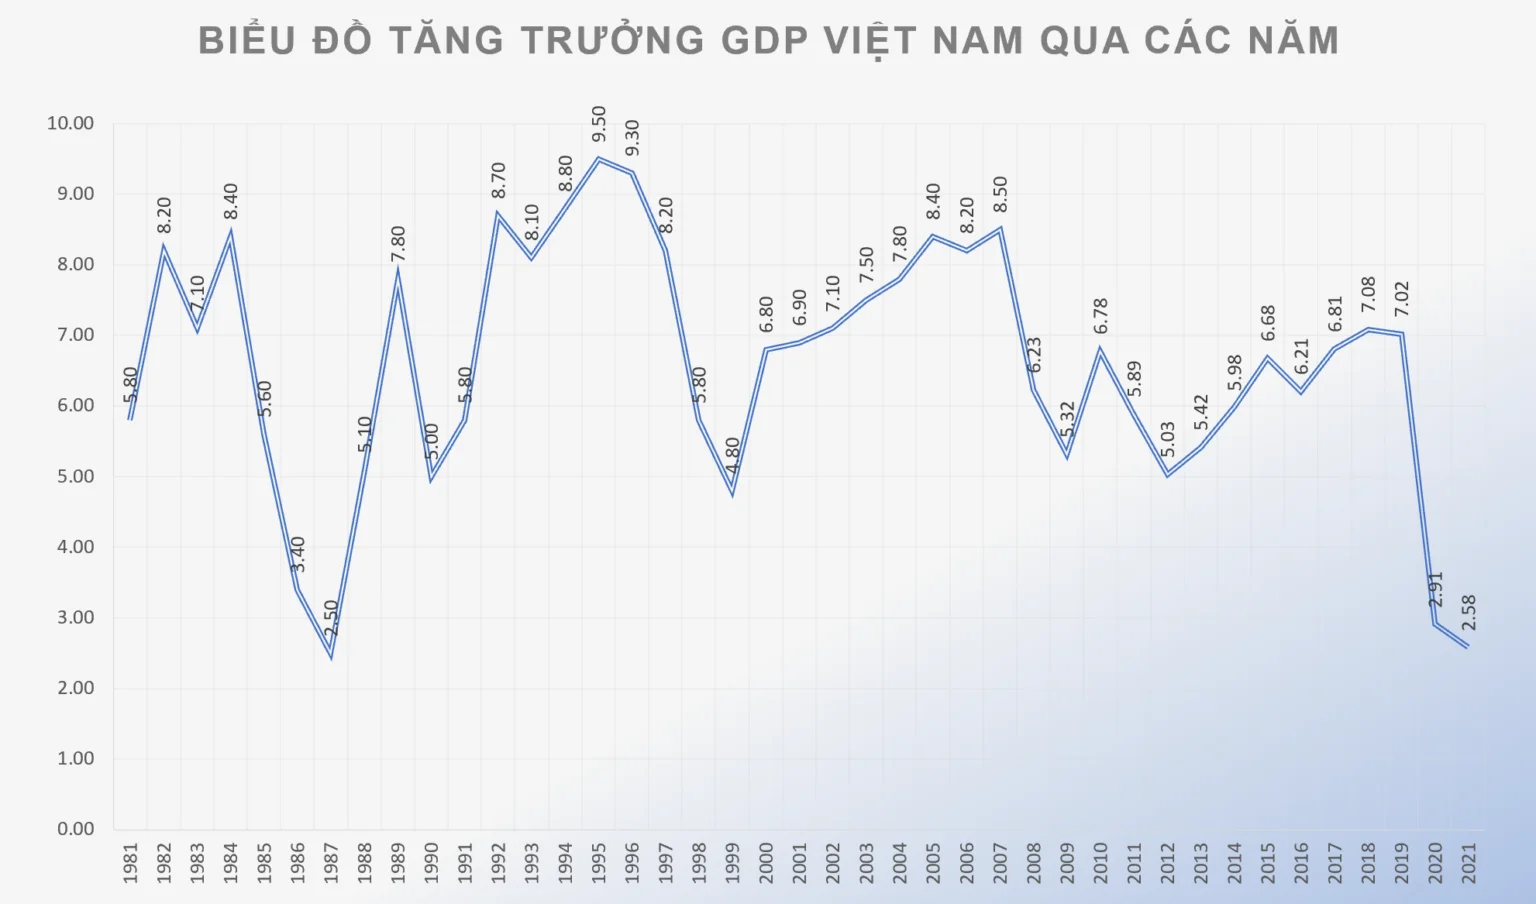

https://trinhj.com/tang-truong-kinh-te-gdp-cua-viet-nam-qua-cac-nam/#T%C4%83ng%20Tr%C6%B0%E1%BB%9Fng%20Kinh%20T%E1%BA%BF%20Vi%E1%BB%87t%20Nam%20N%C4%83m%202020:%202,91%

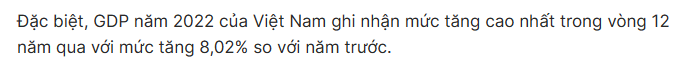

https://thanhnien.vn/2022-nhin-lai-gdp-cao-ky-luc-va-diem-sang-kinh-te-viet-nam-1851537768.htm

In [46]:
g = ((8.02 + 2.58 + 2.91 + 7.02 + 7.08)/5)/100
g

0.055220000000000005

In [47]:
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_Re, stock_beta = CAPM(stock_code, start_date="2023-01-01", end_date="2023-12-30")
    # Lưu kết quả vào các biến toàn cục
    globals()[f'{stock_code}_Re_2023'] = stock_Re
    globals()[f'{stock_code}_beta_2023'] = stock_beta


In [48]:
print(VIX_beta)
print(VIX_Re)
print(VIX_beta_2023)
print(VIX_Re_2023)

1.7734836049970486
0.25086855307912254
2.229287364250319
0.30916585388761586


In [49]:
def Price(stock_code, start_date, end_date):
    import vnstock as vn
    stock_Price = vn.stock_historical_data(symbol= stock_code, resolution="1D", start_date= start_date, end_date= end_date)
    if not stock_Price.empty:
        stock_Price = stock_Price.iloc[-1,4]
        return stock_Price
    else:
        return None

In [50]:
stock_prices = {}
for year in range(2022, 2024):
    start_date = f"{year}-01-01"
    end_date = f"{year+1}-01-01"
    for stock_code in Mã_CP:
        stock_prices[f'{stock_code}_{year}'] = Price(stock_code, start_date, end_date)
        globals()[f'{stock_code}_{year}'] = stock_prices[f'{stock_code}_{year}'] 
        
        

In [51]:
stock_prices

{'AAS_2022': 5200,
 'BVS_2022': 19830,
 'TVS_2022': 18040,
 'MBS_2022': 10700,
 'AGR_2022': 7230,
 'HCM_2022': 13340,
 'SHS_2022': 8400,
 'CTS_2022': 12650,
 'APG_2022': 6250,
 'BSI_2022': 15870,
 'VCI_2022': 22900,
 'FTS_2022': 16870,
 'VND_2022': 13500,
 'DSC_2022': 17640,
 'ORS_2022': 8670,
 'SSI_2022': 17030,
 'VIX_2022': 5650,
 'VFS_2022': 18000,
 'VDS_2022': 7330,
 'PHS_2022': 12910,
 'AAS_2023': 8500,
 'BVS_2023': 25400,
 'TVS_2023': 21100,
 'MBS_2023': 22700,
 'AGR_2023': 16050,
 'HCM_2023': 23760,
 'SHS_2023': 18900,
 'CTS_2023': 28300,
 'APG_2023': 12150,
 'BSI_2023': 47500,
 'VCI_2023': 42750,
 'FTS_2023': 44650,
 'VND_2023': 22250,
 'DSC_2023': 19700,
 'ORS_2023': 17000,
 'SSI_2023': 32800,
 'VIX_2023': 17100,
 'VFS_2023': 19800,
 'VDS_2023': 17100,
 'PHS_2023': 16600}

In [52]:
import pandas as pd

# Tạo DataFrame từ từ điển
df = pd.DataFrame(list(stock_prices.items()), columns=['Stock_Year', 'Mệnh giá'])

# Tách cột 'Stock_Year' thành hai cột riêng biệt: 'Stock' và 'Year'
df[['Mã cổ phiếu', 'Năm']] = df['Stock_Year'].str.split('_', expand=True)

# Xóa cột 'Stock_Year'
df = df.drop(columns='Stock_Year')

# Sắp xếp lại các cột
df = df[['Mã cổ phiếu', 'Năm', 'Mệnh giá']]

df.head()


,Mã cổ phiếu,Năm,Mệnh giá
0,AAS,2022,5200
1,BVS,2022,19830
2,TVS,2022,18040
3,MBS,2022,10700
4,AGR,2022,7230


In [53]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE = globals()[f'{stock_code}_FCFE']
    stock_FCFE = stock_FCFE.iloc[:,1:]
    stock_FCFE_T = stock_FCFE.T
    stock_FCFE_T["Mã cổ phiếu"] = stock_code
    stock_FCFE_T = stock_FCFE_T.reset_index()
    stock_FCFE_T= stock_FCFE_T.rename(columns={stock_FCFE_T.columns[0]: "Năm"})
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_FCFE_T'] = stock_FCFE_T


In [54]:
# Tạo một danh sách để lưu trữ các DataFrame
dataframes = []

# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE_T = globals()[f'{stock_code}_FCFE_T']
    
    # Thêm DataFrame vào danh sách
    dataframes.append(stock_FCFE_T)

# Nối tất cả các DataFrame trong danh sách
concatenated_df = pd.concat(dataframes)


In [55]:
concatenated_df

,Năm,Doanh thu thuần,Tăng trưởng doanh thu thuần,Chi phí hoạt động kinh doanh,% Chi phí hoạt động / Doanh thu thuần,Lợi nhuận gộp,Chi phí quản lý công ty chứng khoán,% Chi phí quản lý / Doanh thu thuần,Thu nhập khác ròng,% Thu nhập khác ròng / Doanh thu thuần,"Lãi/lỗ từ công ty liên doanh, liên kết",% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần,Tổng lợi nhuận kế toán trước thuế,Chi phí thuế thu nhập doanh nghiệp,% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế,Lợi nhuận kế toán sau thuế,Khấu hao,% Khấu hao / Doanh thu thuần,Tăng/Giảm vốn lưu động,% Tăng/Giảm vốn lưu động / Doanh thu thuần,Chi đầu tư mới vào TSCĐ,% Chi đầu tư mới vào TSCĐ / Doanh thu thuần,Tăng/Giảm nợ ròng,% Tăng/Giảm nợ ròng / Doanh thu thuần,FCFE,Mã cổ phiếu
0,2018,77.00,5.42,43.00,0.56,34.00,6.00,0.08,0.00,0.00,0.00,0.00,28.00,5.00,0.18,23.00,4.00,0.05,24.00,0.31,0.00,0.00,28.00,0.36,31.00,AAS
1,2019,135.00,0.75,102.00,0.76,33.00,7.00,0.05,-2.00,-0.01,0.00,0.00,24.00,5.00,0.21,19.00,23.00,0.17,47.00,0.35,-3.00,-0.02,15.00,0.11,13.00,AAS
2,2020,504.00,2.73,492.00,0.98,12.00,6.00,0.01,1.00,0.00,0.00,0.00,7.00,1.00,0.14,6.00,23.00,0.05,35.00,0.07,1.00,0.00,57.00,0.11,50.00,AAS
3,2021,958.00,0.90,470.00,0.49,488.00,14.00,0.01,0.00,0.00,0.00,0.00,474.00,94.00,0.20,380.00,24.00,0.03,889.00,0.93,2.00,0.00,-155.00,-0.16,-642.00,AAS
4,2022,1227.00,0.28,796.00,0.65,431.00,26.00,0.02,11.00,0.01,0.00,0.00,416.00,80.00,0.19,336.00,1.00,0.00,181.00,0.15,195.00,0.16,626.00,0.51,587.00,AAS
0,2018,523.00,0.13,322.00,0.62,201.00,75.00,0.14,0.00,0.00,0.00,0.00,126.00,19.00,0.15,107.00,0.00,0.00,382.00,0.73,7.00,0.01,496.00,0.95,214.00,BVS
1,2019,541.00,0.03,285.00,0.53,256.00,88.00,0.16,0.00,0.00,0.00,0.00,168.00,16.00,0.10,152.00,0.00,0.00,403.00,0.74,5.00,0.01,-352.00,-0.65,-608.00,BVS
2,2020,568.00,0.05,318.00,0.56,250.00,89.00,0.16,0.00,0.00,0.00,0.00,161.00,22.00,0.14,139.00,0.00,0.00,-400.00,-0.70,5.00,0.01,1032.00,1.82,1566.00,BVS
3,2021,1138.00,1.00,510.00,0.45,628.00,177.00,0.16,-1.00,-0.00,0.00,0.00,450.00,68.00,0.15,382.00,0.00,0.00,431.00,0.38,4.00,0.00,2059.00,1.81,2006.00,BVS
4,2022,855.00,-0.25,483.00,0.56,372.00,115.00,0.13,2.00,0.00,0.00,0.00,259.00,34.00,0.13,225.00,0.00,0.00,-73.00,-0.09,4.00,0.00,-1982.00,-2.32,-1688.00,BVS


In [56]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 4
Data columns (total 26 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Năm                                                          100 non-null    object 
 1   Doanh thu thuần                                              100 non-null    float64
 2   Tăng trưởng doanh thu thuần                                  100 non-null    float64
 3   Chi phí hoạt động kinh doanh                                 100 non-null    float64
 4   % Chi phí hoạt động / Doanh thu thuần                        100 non-null    float64
 5   Lợi nhuận gộp                                                100 non-null    float64
 6   Chi phí quản lý công ty chứng khoán                          100 non-null    float64
 7   % Chi phí quản lý / Doanh thu thuần                          100 non-null    float64
 8

In [57]:
concatenated_df = concatenated_df.fillna(0)

In [58]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 4
Data columns (total 26 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Năm                                                          100 non-null    object 
 1   Doanh thu thuần                                              100 non-null    float64
 2   Tăng trưởng doanh thu thuần                                  100 non-null    float64
 3   Chi phí hoạt động kinh doanh                                 100 non-null    float64
 4   % Chi phí hoạt động / Doanh thu thuần                        100 non-null    float64
 5   Lợi nhuận gộp                                                100 non-null    float64
 6   Chi phí quản lý công ty chứng khoán                          100 non-null    float64
 7   % Chi phí quản lý / Doanh thu thuần                          100 non-null    float64
 8

In [59]:
# Gộp hai DataFrame dựa trên cột 'Năm' và 'Mã cổ phiếu'
merged_df = pd.merge(df, concatenated_df, on=['Năm', 'Mã cổ phiếu'])
merged_df.iloc[:, ~merged_df.columns.isin(['Mệnh giá', 'Mã cổ phiếu', 'Năm'])] *= 10**6
merged_df['Mệnh giá'] /= 10**3



In [60]:
merged_df

,Mã cổ phiếu,Năm,Mệnh giá,Doanh thu thuần,Tăng trưởng doanh thu thuần,Chi phí hoạt động kinh doanh,% Chi phí hoạt động / Doanh thu thuần,Lợi nhuận gộp,Chi phí quản lý công ty chứng khoán,% Chi phí quản lý / Doanh thu thuần,Thu nhập khác ròng,% Thu nhập khác ròng / Doanh thu thuần,"Lãi/lỗ từ công ty liên doanh, liên kết",% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần,Tổng lợi nhuận kế toán trước thuế,Chi phí thuế thu nhập doanh nghiệp,% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế,Lợi nhuận kế toán sau thuế,Khấu hao,% Khấu hao / Doanh thu thuần,Tăng/Giảm vốn lưu động,% Tăng/Giảm vốn lưu động / Doanh thu thuần,Chi đầu tư mới vào TSCĐ,% Chi đầu tư mới vào TSCĐ / Doanh thu thuần,Tăng/Giảm nợ ròng,% Tăng/Giảm nợ ròng / Doanh thu thuần,FCFE
0,AAS,2022,5.20,1227000000.00,280793.32,796000000.00,648736.76,431000000.00,26000000.00,21189.89,11000000.00,8964.96,0.00,0.00,416000000.00,80000000.00,192307.69,336000000.00,1000000.00,815.00,181000000.00,147514.26,195000000.00,158924.21,626000000.00,510187.45,587000000.00
1,BVS,2022,19.83,855000000.00,-248681.90,483000000.00,564912.28,372000000.00,115000000.00,134502.92,2000000.00,2339.18,0.00,0.00,259000000.00,34000000.00,131274.13,225000000.00,0.00,0.00,-73000000.00,-85380.12,4000000.00,4678.36,-1982000000.00,-2318128.65,-1688000000.00
2,TVS,2022,18.04,1022000000.00,-19193.86,493000000.00,482387.48,529000000.00,37000000.00,36203.52,0.00,0.00,0.00,0.00,492000000.00,8000000.00,16260.16,484000000.00,5000000.00,4892.37,180000000.00,176125.24,5000000.00,4892.37,2311000000.00,2261252.45,2615000000.00
3,MBS,2022,10.70,1958000000.00,-117222.72,726000000.00,370786.52,1232000000.00,188000000.00,96016.34,12000000.00,6128.70,0.00,0.00,1056000000.00,146000000.00,138257.58,910000000.00,44000000.00,22471.91,-46000000.00,-23493.36,113000000.00,57711.95,-1557000000.00,-795199.18,-670000000.00
4,AGR,2022,7.23,367000000.00,-68527.92,124000000.00,337874.66,243000000.00,81000000.00,220708.45,17000000.00,46321.53,0.00,0.00,179000000.00,34000000.00,189944.13,145000000.00,7000000.00,19073.57,-35000000.00,-95367.85,87000000.00,237057.22,-257000000.00,-700272.48,-157000000.00
5,HCM,2022,13.34,3901000000.00,-125336.32,2486000000.00,637272.49,1415000000.00,351000000.00,89976.93,0.00,0.00,0.00,0.00,1064000000.00,215000000.00,202067.67,849000000.00,26000000.00,6664.96,564000000.00,144578.31,36000000.00,9228.40,-7931000000.00,-2033068.44,-7656000000.00
6,SHS,2022,8.40,1542000000.00,-467357.51,1089000000.00,706225.68,453000000.00,98000000.00,63553.83,0.00,0.00,0.00,0.00,355000000.00,35000000.00,98591.55,320000000.00,6000000.00,3891.05,2833000000.00,1837224.38,9000000.00,5836.58,-3780000000.00,-2451361.87,-6296000000.00
7,CTS,2022,12.65,872000000.00,-181220.66,476000000.00,545871.56,396000000.00,90000000.00,103211.01,0.00,0.00,0.00,0.00,306000000.00,8000000.00,26143.79,298000000.00,8000000.00,9174.31,11000000.00,12614.68,5000000.00,5733.94,-1512000000.00,-1733944.95,-1222000000.00
8,APG,2022,6.25,184000000.00,-514511.87,390000000.00,2119565.22,-206000000.00,16000000.00,86956.52,-2000000.00,-10869.57,0.00,0.00,-224000000.00,-39000000.00,174107.14,-185000000.00,1000000.00,5434.78,399000000.00,2168478.26,1000000.00,5434.78,-283000000.00,-1538043.48,-867000000.00
9,BSI,2022,15.87,1089000000.00,-183045.76,658000000.00,604224.06,431000000.00,118000000.00,108356.29,0.00,0.00,0.00,0.00,313000000.00,37000000.00,118210.86,276000000.00,7000000.00,6427.92,2849000000.00,2616161.62,14000000.00,12855.83,-3265000000.00,-2998163.45,-5845000000.00


In [61]:
merged_df.columns

Index(['Mã cổ phiếu', 'Năm', 'Mệnh giá', 'Doanh thu thuần',
       'Tăng trưởng doanh thu thuần', 'Chi phí hoạt động kinh doanh',
       '% Chi phí hoạt động / Doanh thu thuần', 'Lợi nhuận gộp',
       'Chi phí quản lý công ty chứng khoán',
       '% Chi phí quản lý / Doanh thu thuần', 'Thu nhập khác ròng',
       '% Thu nhập khác ròng / Doanh thu thuần',
       'Lãi/lỗ từ công ty liên doanh, liên kết',
       '% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần',
       'Tổng lợi nhuận kế toán trước thuế',
       'Chi phí thuế thu nhập doanh nghiệp',
       '% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế',
       'Lợi nhuận kế toán sau thuế', 'Khấu hao',
       '% Khấu hao / Doanh thu thuần', 'Tăng/Giảm vốn lưu động',
       '% Tăng/Giảm vốn lưu động / Doanh thu thuần', 'Chi đầu tư mới vào TSCĐ',
       '% Chi đầu tư mới vào TSCĐ / Doanh thu thuần', 'Tăng/Giảm nợ ròng',
       '% Tăng/Giảm nợ ròng / Doanh thu thuần', 'FCFE'],
      dtype='object')

In [62]:
# Danh sách các cột bạn muốn giữ
columns_to_keep = ['Mệnh giá', 'Doanh thu thuần', 'Tăng trưởng doanh thu thuần', 
                   'Chi phí hoạt động kinh doanh', '% Chi phí hoạt động / Doanh thu thuần', 
                   'Chi phí quản lý công ty chứng khoán', '% Chi phí quản lý / Doanh thu thuần',
                   'Thu nhập khác ròng', '% Thu nhập khác ròng / Doanh thu thuần',
                   'Chi phí thuế thu nhập doanh nghiệp', '% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế',
                   'Lợi nhuận kế toán sau thuế',
                   'Khấu hao', '% Khấu hao / Doanh thu thuần',
                   'Tăng/Giảm vốn lưu động', '% Tăng/Giảm vốn lưu động / Doanh thu thuần',
                   'Chi đầu tư mới vào TSCĐ', '% Chi đầu tư mới vào TSCĐ / Doanh thu thuần' ,
                   'Tăng/Giảm nợ ròng','% Tăng/Giảm nợ ròng / Doanh thu thuần',
                   'FCFE']

# Tạo new_numeric_df bằng cách lọc các cột trong columns_to_keep từ numeric_df
new_merged_df = merged_df[columns_to_keep]


In [63]:
new_merged_df = new_merged_df.rename(columns={
    'Doanh thu thuần': 'DT Thuần',
    'Tăng trưởng doanh thu thuần': 'Tăng trưởng DT thuần',
    'Chi phí hoạt động kinh doanh': 'CP hoạt động KD',
    '% Chi phí hoạt động / Doanh thu thuần': '% CP hoạt động / DT thuần',
    'Chi phí quản lý công ty chứng khoán' : 'CP quản lý',
    '% Chi phí quản lý / Doanh thu thuần': 'CP quản lý / DT thuần',
    'Thu nhập khác ròng' : 'TN khác ròng',
    '% Thu nhập khác ròng / Doanh thu thuần' : '% TN khác ròng / DT thuần',
    'Chi phí thuế thu nhập doanh nghiệp': 'Thuế TN Doanh nghiệp',
    '% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế': 'Thuế / LN trước thuế',
    '% Khấu hao / Doanh thu thuần': '% Khấu hao / DT thuần',
    '% Tăng/Giảm vốn lưu động / Doanh thu thuần':'% Tăng/Giảm vốn lưu động / DT thuần',
    '% Chi đầu tư mới vào TSCĐ / Doanh thu thuần':'% Chi đầu tư mới vào TSCĐ / DT thuần',
    '% Tăng/Giảm nợ ròng / Doanh thu thuần': '% Tăng/Giảm nợ ròng / DT thuần'
})

In [64]:
corelation = new_merged_df.corr()
ones_corr = np.ones_like(corelation, dtype=bool)
mask = np.triu(ones_corr)

In [65]:
pd.options.display.max_columns = 50
corelation

,Mệnh giá,DT Thuần,Tăng trưởng DT thuần,CP hoạt động KD,% CP hoạt động / DT thuần,CP quản lý,CP quản lý / DT thuần,TN khác ròng,% TN khác ròng / DT thuần,Thuế TN Doanh nghiệp,Thuế / LN trước thuế,Lợi nhuận kế toán sau thuế,Khấu hao,% Khấu hao / DT thuần,Tăng/Giảm vốn lưu động,% Tăng/Giảm vốn lưu động / DT thuần,Chi đầu tư mới vào TSCĐ,% Chi đầu tư mới vào TSCĐ / DT thuần,Tăng/Giảm nợ ròng,% Tăng/Giảm nợ ròng / DT thuần,FCFE
Mệnh giá,1.00,0.18,0.13,0.03,-0.47,0.09,0.01,0.26,-0.10,0.29,-0.16,0.33,0.15,-0.02,-0.00,-0.23,-0.22,-0.34,-0.28,-0.02,-0.13
DT Thuần,0.18,1.00,-0.06,0.96,-0.16,0.87,-0.47,0.22,-0.07,0.92,-0.13,0.94,0.74,-0.10,0.72,-0.03,0.42,-0.23,-0.59,-0.01,-0.66
Tăng trưởng DT thuần,0.13,-0.06,1.00,-0.03,-0.29,-0.08,0.27,-0.02,0.01,-0.11,-0.19,-0.07,-0.12,-0.13,-0.14,-0.29,0.01,0.29,0.42,0.74,0.37
CP hoạt động KD,0.03,0.96,-0.03,1.00,-0.02,0.88,-0.47,0.11,-0.14,0.80,-0.10,0.81,0.60,-0.22,0.64,-0.00,0.31,-0.27,-0.51,0.01,-0.59
% CP hoạt động / DT thuần,-0.47,-0.16,-0.29,-0.02,1.00,-0.15,-0.13,-0.25,-0.42,-0.32,0.15,-0.29,-0.21,-0.25,-0.06,0.39,-0.19,-0.22,0.15,-0.09,0.08
CP quản lý,0.09,0.87,-0.08,0.88,-0.15,1.00,-0.13,-0.03,-0.07,0.77,-0.03,0.72,0.69,0.10,0.53,-0.16,0.31,-0.19,-0.62,-0.13,-0.61
CP quản lý / DT thuần,0.01,-0.47,0.27,-0.47,-0.13,-0.13,1.00,-0.21,0.35,-0.43,0.15,-0.46,-0.22,0.49,-0.38,-0.29,-0.19,0.44,0.21,0.02,0.29
TN khác ròng,0.26,0.22,-0.02,0.11,-0.25,-0.03,-0.21,1.00,0.56,0.32,-0.04,0.36,0.15,0.03,-0.11,-0.35,0.30,0.25,-0.17,0.03,0.02
% TN khác ròng / DT thuần,-0.10,-0.07,0.01,-0.14,-0.42,-0.07,0.35,0.56,1.00,0.04,0.13,0.01,-0.03,0.33,-0.19,-0.38,0.33,0.77,0.08,0.06,0.17
Thuế TN Doanh nghiệp,0.29,0.92,-0.11,0.80,-0.32,0.77,-0.43,0.32,0.04,1.00,0.04,0.95,0.82,0.08,0.69,-0.06,0.55,-0.10,-0.70,-0.11,-0.73


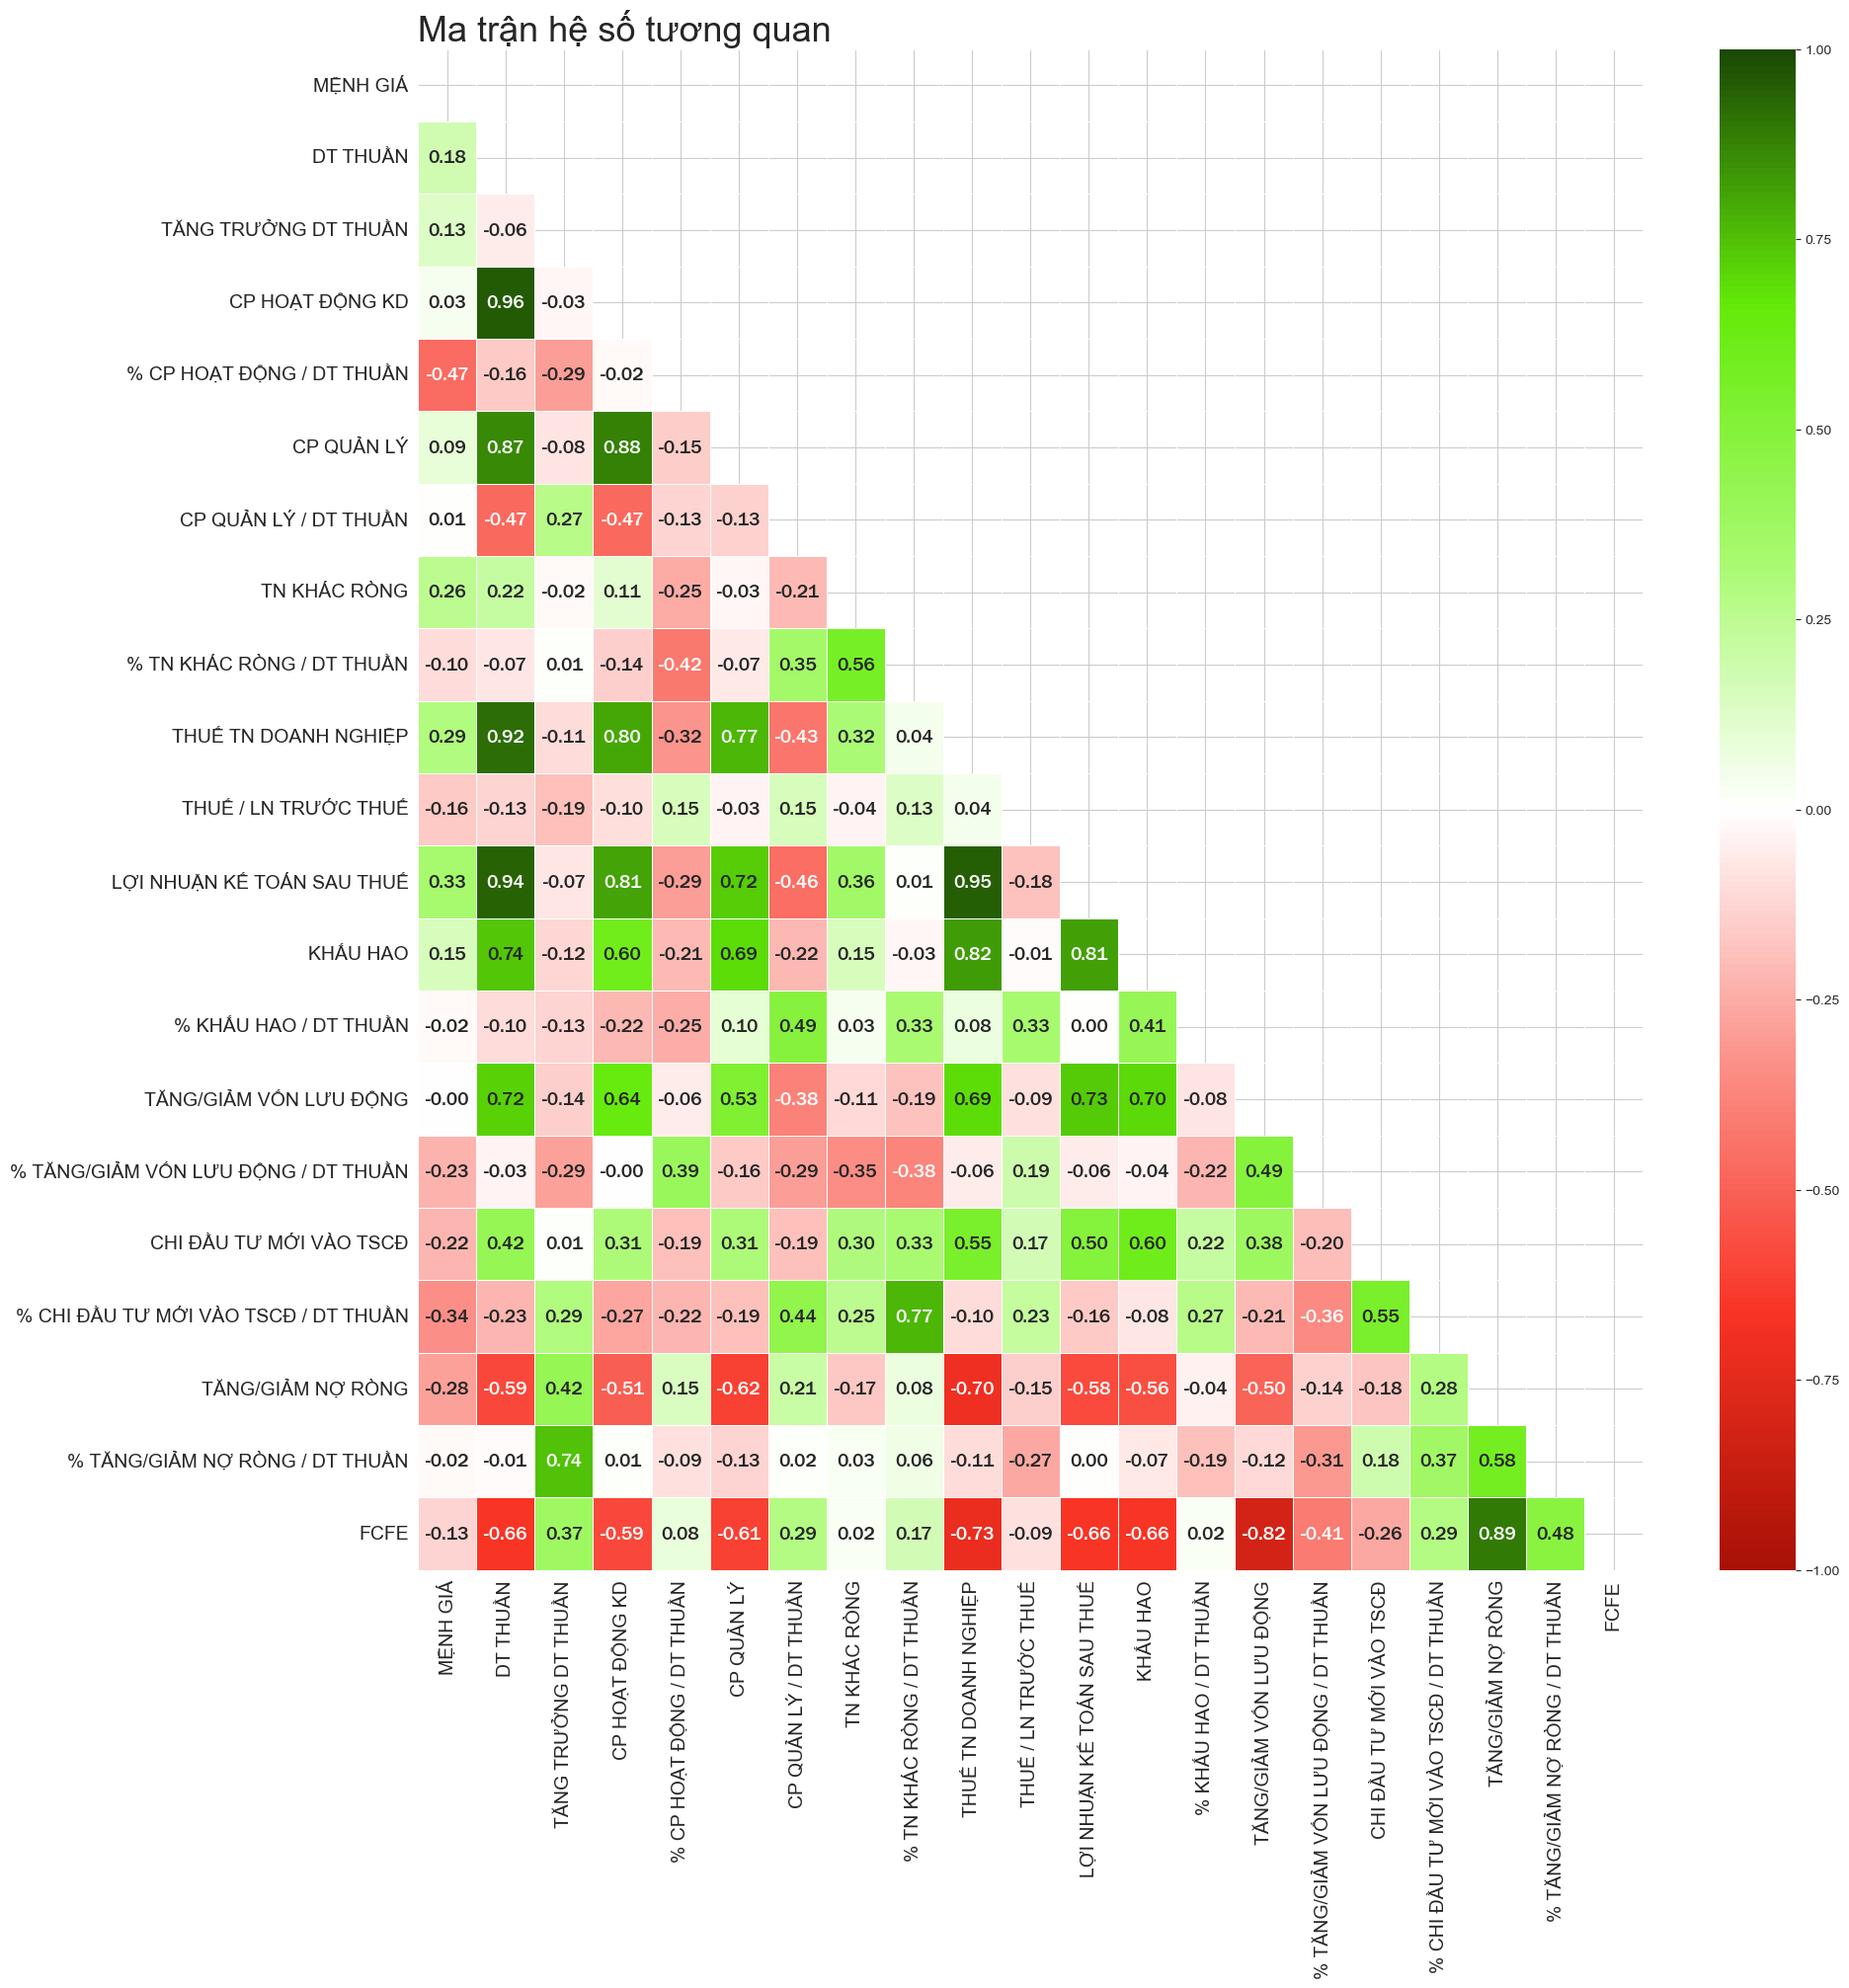

<Figure size 14080x10560 with 0 Axes>

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Tạo colormap tùy chỉnh
cmap = LinearSegmentedColormap.from_list(name='custom', colors=['#A71105'
                                                                ,'#F83324','#FB9189'
                                                                , 'white'
                                                                , '#A7FA6E', '#63EA08'
                                                                ,'#1B4804' ])

fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(data=corelation,  mask=mask,
            annot=True, annot_kws={"fontsize":14,
                                  "fontname" : "Franklin Gothic Medium"}, fmt=".2f", 
            cmap=cmap,  # Sử dụng colormap tùy chỉnh
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5)

yticks = [i.upper() for i in corelation.index]
xticks = [i.upper() for i in corelation.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=14 )
ax.set_xticklabels(xticks, rotation=90, fontsize=14)
title = "Ma trận hệ số tương quan"
ax.set_title(title, loc='left', fontsize=26)

# Lưu heatmap thành tệp PNG
#output_file_path = 'correlation_matrix.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Hiển thị heatmap (nếu bạn muốn)
plt.figure(dpi=2200)
plt.show()

In [67]:
def VCP_2022(stock_CDKt):    
    stock_VCP = pd.DataFrame(columns= stock_CDKT.columns)
    
    stock_VonGop = VIX_CDKT[VIX_CDKT.index.str.contains('1.1. Vốn góp của chủ sở hữu')]
    stock_cophieuquy = VIX_CDKT[VIX_CDKT.index.str.contains('1.5. Cổ phiếu quỹ')]


    # Ensure VIX_VonGop and VIX_cophieuquy have the same columns as VIX_CDKT
    stock_VonGop = stock_VonGop.reindex(columns=stock_CDKT.columns)
    stock_cophieuquy = stock_cophieuquy.reindex(columns=stock_CDKT.columns)

    stock_VCP.loc['Vốn góp CSH'] = stock_VonGop.squeeze()
    stock_VCP.loc['Cổ phiếu quỹ'] =stock_cophieuquy.squeeze()

    # Perform the subtraction
    stock_VCP.loc['Vốn cổ phần'] = (stock_VCP.loc['Vốn góp CSH'] - stock_VCP.loc['Cổ phiếu quỹ'])
    #VIX_VCP.loc['Tăng trưởng vốn cổ phần'] = VIX_VCP.loc['Vốn cổ phần'].to_frame().T.pct_change(axis=1)

    # Calculate the percentage change
    percentage_change = stock_VCP.loc['Vốn cổ phần'].to_frame().T.pct_change(axis=1)

    # Add a NaN value to the beginning
    percentage_change.insert(0, 'NaN', np.nan)

    # Assign the row to VIX_VCP
    stock_VCP.loc['Tăng trưởng vốn cổ phần'] = percentage_change.squeeze()

    average_growth = stock_VCP.loc['Tăng trưởng vốn cổ phần'].mean()

    stock_VCP_2022 = stock_VCP.loc['Vốn cổ phần', '2022']
    
    return stock_VCP_2022


In [68]:
for stock_code in Mã_CP:
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    
    globals()[f'{stock_code}_VCP_2022'] = VCP_2022(stock_CDKT)


In [69]:
def VCP_2023(stock_CDKT):
    stock_VCP = pd.DataFrame(columns= stock_CDKT.columns)
    
    stock_VonGop = VIX_CDKT[VIX_CDKT.index.str.contains('1.1. Vốn góp của chủ sở hữu')]
    stock_cophieuquy = VIX_CDKT[VIX_CDKT.index.str.contains('1.5. Cổ phiếu quỹ')]


    # Ensure VIX_VonGop and VIX_cophieuquy have the same columns as VIX_CDKT
    stock_VonGop = stock_VonGop.reindex(columns=stock_CDKT.columns)
    stock_cophieuquy = stock_cophieuquy.reindex(columns=stock_CDKT.columns)

    stock_VCP.loc['Vốn góp CSH'] = stock_VonGop.squeeze()
    stock_VCP.loc['Cổ phiếu quỹ'] =stock_cophieuquy.squeeze()

    # Perform the subtraction
    stock_VCP.loc['Vốn cổ phần'] = (stock_VCP.loc['Vốn góp CSH'] - stock_VCP.loc['Cổ phiếu quỹ'])
    #VIX_VCP.loc['Tăng trưởng vốn cổ phần'] = VIX_VCP.loc['Vốn cổ phần'].to_frame().T.pct_change(axis=1)

    # Calculate the percentage change
    percentage_change = stock_VCP.loc['Vốn cổ phần'].to_frame().T.pct_change(axis=1)

    # Add a NaN value to the beginning
    percentage_change.insert(0, 'NaN', np.nan)

    # Assign the row to VIX_VCP
    stock_VCP.loc['Tăng trưởng vốn cổ phần'] = percentage_change.squeeze()

    average_growth = stock_VCP.loc['Tăng trưởng vốn cổ phần'].mean()

    stock_VCP_2022 = stock_VCP.loc['Vốn cổ phần', '2022']
    
    stock_VCP_2023 = stock_VCP_2022 * ( 1 + average_growth )
    
    return stock_VCP_2023

In [70]:
for stock_code in Mã_CP:
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    
    globals()[f'{stock_code}_VCP_2023'] = VCP_2023(stock_CDKT)


In [71]:
VIX_VCP_2022

5821.0

In [72]:
VIX_VCP_2023

9201.782898714924

In [73]:
def stock_equity(stock_FCFE_FORECAST, stock_Re, n):
    stock_FCFE_FORECAST_DCF = stock_FCFE_FORECAST.tail(1)

    # Lấy FCFE năm cuối cùng
    stock_last_year_FCFE = stock_FCFE_FORECAST_DCF.iloc[0, -1]

    # Tính Terminal_value
    stock_Terminal_value = stock_last_year_FCFE * (1 + g) / (stock_Re - g)

    # Khởi tạo giá trị NPV
    stock_equity_value = 0

    # Lặp qua từng năm từ 2023 đến 2025
    for i in range(n):
        # Nếu đây là năm cuối cùng (2025), thêm Terminal_value vào FCFE
        if i == (n - 1):
            FCFE = stock_FCFE_FORECAST_DCF.iloc[0, -n+i] + stock_Terminal_value
        else:
            FCFE = stock_FCFE_FORECAST_DCF.iloc[0, -n+i]

        # Tính NPV cho năm hiện tại và cộng dồn vào equity_value
        stock_equity_value += FCFE / (1 + stock_Re)**(i+1)
        
    return stock_equity_value

In [74]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE_FORECAST = globals()[f'{stock_code}_FCFE_FORECAST']
    stock_Re = globals()[f'{stock_code}_Re']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_equity_value'] = stock_equity(stock_FCFE_FORECAST, stock_Re, 3)


In [75]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE_FORECAST = globals()[f'{stock_code}_FCFE_FORECAST']
    stock_Re = globals()[f'{stock_code}_Re_2023']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_equity_value_2023'] = stock_equity(stock_FCFE_FORECAST, stock_Re, 2)


In [76]:
SSI_equity_value

58332.34862403002

In [77]:
SSI_equity_value_2023

56307.81880462644

In [78]:
def Price_per_share(stock_VCP, stock_Price,
                    stock_equity_value):

    stock_Share_outstanding = (stock_VCP * (10**9)) / stock_Price
    stock_Price_per_share = (stock_equity_value * (10**9)) / stock_Share_outstanding
    
    return stock_Price_per_share

In [79]:
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_VCP = globals()[f'{stock_code}_VCP_2022']
    stock_Price_2022 = globals()[f'{stock_code}_2022']
    stock_equity_value = globals()[f'{stock_code}_equity_value']    
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_Price_per_share_2022'] = Price_per_share(stock_VCP, stock_Price_2022,
                                                                      stock_equity_value)

In [80]:
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_VCP_2023 = globals()[f'{stock_code}_VCP_2023']
    stock_Price_2023 = globals()[f'{stock_code}_2023']
    stock_equity_value_2023 = globals()[f'{stock_code}_equity_value_2023']    
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_Price_per_share_2023'] = Price_per_share(stock_VCP_2023, stock_Price_2023,
                                                                      stock_equity_value_2023)

In [83]:
print(VND_equity_value)
print(VND_Price_per_share_2022)
print(VND_Price_per_share_2023)
print(VND_2022)
print(VND_2023)



100117.9298760724
232192.41596409163
224561.6265201004
13500
22250


In [84]:
data = {
    "Mã_CP": [],
    "Historical FCFE 2018": [],
    "Historical FCFE 2019": [],
    "Historical FCFE 2020": [],
    "Historical FCFE 2021": [],
    "Historical FCFE 2022": [],
    "Forecast FCFE 2023": [],
    "Forecast FCFE 2024": [],
    "Forecast FCFE 2025": [],
    "Equity value 2022": [],
    "Price per share 2022": [],
    "Equity value 2023": [],
    "Price per share 2023": [],
    "Price 2022": [],
    "Price 2023": []
}

for mã in Mã_CP:
    data["Mã_CP"].append(mã)
    data["Historical FCFE 2018"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2018']"))
    data["Historical FCFE 2019"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2019']"))
    data["Historical FCFE 2020"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2020']"))
    data["Historical FCFE 2021"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2021']"))
    data["Historical FCFE 2022"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2022']"))
    data["Forecast FCFE 2023"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2023']"))
    data["Forecast FCFE 2024"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2024']"))
    data["Forecast FCFE 2025"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2025']"))
    data["Equity value 2022"].append(eval(f"{mã}_equity_value"))
    data["Price per share 2022"].append(eval(f"{mã}_Price_per_share_2022"))
    data["Equity value 2023"].append(eval(f"{mã}_equity_value_2023"))
    data["Price per share 2023"].append(eval(f"{mã}_Price_per_share_2023"))
    data["Price 2022"].append(eval(f"{mã}_2022"))
    data["Price 2023"].append(eval(f"{mã}_2023"))

df = pd.DataFrame(data)


In [85]:
df

,Mã_CP,Historical FCFE 2018,Historical FCFE 2019,Historical FCFE 2020,Historical FCFE 2021,Historical FCFE 2022,Forecast FCFE 2023,Forecast FCFE 2024,Forecast FCFE 2025,Equity value 2022,Price per share 2022,Equity value 2023,Price per share 2023,Price 2022,Price 2023
0,AAS,31.00,13.00,50.00,-642.00,587.00,300.95,703.34,1725.84,5773.27,5157.36,7207.63,6657.93,5200,8500
1,BVS,214.00,-608.00,1566.00,2006.00,-1688.00,374.47,451.87,560.83,2255.51,7683.69,2853.61,7876.91,19830,25400
2,TVS,802.00,516.00,463.00,2849.00,2615.00,2315.66,2881.36,3797.19,37789.57,117114.57,31179.43,71495.50,18040,21100
3,MBS,-790.00,1303.00,2781.00,1437.00,-670.00,1642.97,2036.87,2661.19,8459.14,15549.36,9151.81,22576.72,10700,22700
4,AGR,98.00,188.00,136.00,-175.00,-157.00,96.01,116.96,144.60,642.66,798.22,662.53,1155.61,7230,16050
5,HCM,-1185.00,-616.00,5948.00,265.00,-7656.00,-167.39,-209.63,-287.21,-1221.82,-2800.06,-1175.47,-3035.19,13340,23760
6,SHS,-1392.00,1535.00,371.00,-33.00,-6296.00,-1248.06,-1460.56,-1800.55,-5895.89,-8508.07,-5782.32,-11876.60,8400,18900
7,CTS,378.00,651.00,1414.00,1854.00,-1222.00,1119.99,1324.11,1673.71,6861.21,14910.55,6398.93,19679.85,12650,28300
8,APG,19.00,39.00,4.00,-237.00,-867.00,-559.36,-2535.08,-9880.07,-35746.64,-38381.12,-63000.46,-83185.57,6250,12150
9,BSI,-869.00,916.00,442.00,2896.00,-5845.00,-558.32,-631.58,-773.13,-3384.48,-9227.22,-3226.26,-16654.11,15870,47500


In [86]:
# Danh sách mã cổ phiếu theo thứ tự mong muốn
order = ["SSI", "VND", "VCI", "SHS", "HCM", "VIX", "MBS", "BSI", "FTS", "CTS", "AGR", "VDS", "DSC", "ORS", "TVS", "PHS", "VFS", "AAS", "BVS", "APG"]

# Sắp xếp DataFrame dựa trên danh sách mã cổ phiếu
df = df.set_index('Mã_CP').loc[order].reset_index()


In [87]:
df

,Mã_CP,Historical FCFE 2018,Historical FCFE 2019,Historical FCFE 2020,Historical FCFE 2021,Historical FCFE 2022,Forecast FCFE 2023,Forecast FCFE 2024,Forecast FCFE 2025,Equity value 2022,Price per share 2022,Equity value 2023,Price per share 2023,Price 2022,Price 2023
0,SSI,5093.00,7122.00,13574.00,6448.00,-13074.00,8497.60,10192.13,12874.15,58332.35,170657.94,56307.82,200710.72,17030,32800
1,VND,756.00,1778.00,4677.00,9110.00,-5366.00,9576.98,15087.51,25575.65,100117.93,232192.42,92870.44,224561.63,13500,22250
2,VCI,-676.00,1118.00,1281.00,5210.00,-2834.00,1338.01,1657.15,2182.41,8843.26,34789.68,8317.79,38643.11,22900,42750
3,SHS,-1392.00,1535.00,371.00,-33.00,-6296.00,-1248.06,-1460.56,-1800.55,-5895.89,-8508.07,-5782.32,-11876.60,8400,18900
4,HCM,-1185.00,-616.00,5948.00,265.00,-7656.00,-167.39,-209.63,-287.21,-1221.82,-2800.06,-1175.47,-3035.19,13340,23760
5,VIX,314.00,-400.00,8.00,-931.00,-5185.00,-1637.08,-2257.87,-3300.28,-13532.58,-13135.04,-11651.59,-21652.56,5650,17100
6,MBS,-790.00,1303.00,2781.00,1437.00,-670.00,1642.97,2036.87,2661.19,8459.14,15549.36,9151.81,22576.72,10700,22700
7,BSI,-869.00,916.00,442.00,2896.00,-5845.00,-558.32,-631.58,-773.13,-3384.48,-9227.22,-3226.26,-16654.11,15870,47500
8,FTS,41.00,345.00,693.00,3678.00,-2975.00,404.00,582.15,941.80,3528.49,10226.01,3513.60,17049.09,16870,44650
9,CTS,378.00,651.00,1414.00,1854.00,-1222.00,1119.99,1324.11,1673.71,6861.21,14910.55,6398.93,19679.85,12650,28300


In [88]:
last_stock_list = ['VND', 'VIX', 'SHS', 'TVS']